# <b><u>LH_CD_GIOVANNI_BIANCHINI_DE_BARROS</u></b>

## Desafio Cientista de Dados

### Desafio

Você foi alocado em um time da Indicium contratado por um estúdio de Hollywood chamado PProductions, e agora deve fazer uma análise em cima de um banco de dados cinematográfico para orientar qual tipo de filme deve ser o próximo a ser desenvolvido. Lembre-se que há muito dinheiro envolvido, então a análise deve ser muito detalhada e levar em consideração o máximo de fatores possíveis (a introdução de dados externos é permitida - e encorajada).
</br></br>


# <b><u>Importando as Bibliotecas</u></b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.float_format', '{:.2f}'.format)

<br><br>

# <b><u>Importando e verificando o Dataset</b></u>

In [3]:
df = pd.read_csv('desafio_indicium_imdb.csv', index_col=[0])
df = df.reset_index().drop('index', axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 117.2+ KB


In [5]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,999.00,842.00,999.00
mean,7.95,77.97,271621.42
std,0.27,12.38,320912.62
min,7.60,28.00,25088.00
25%,7.70,70.00,55471.50
50%,7.90,79.00,138356.00
75%,8.10,87.00,373167.50
max,9.20,100.00,2303232.00


In [6]:
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175 min,"Crime, Drama",9.20,An organized crime dynasty's aging patriarch t...,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.00,When the menace known as the Joker wreaks havo...,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.00,The early life and career of Vito Corleone in ...,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,12 Angry Men,1957,U,96 min,"Crime, Drama",9.00,A jury holdout attempts to prevent a miscarria...,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.90,Gandalf and Aragorn lead the World of Men agai...,94.00,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [7]:
df.isnull().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

<br><br>

# <b><u>Pré-processamento de dados</b></u>

## <u>Verificando se existem Valores Duplicados</u>:

In [8]:
df[df.duplicated()]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross


In [9]:
df[df.duplicated(subset=['Series_Title'])]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
135,Drishyam,2015,UA,163 min,"Crime, Drama, Mystery",8.20,Desperate measures are taken by a man who trie...,NaN,Nishikant Kamat,Ajay Devgn,Shriya Saran,Tabu,Rajat Kapoor,70367,"739,478"


In [10]:
df[df['Series_Title'] == 'Drishyam']

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
86,Drishyam,2013,U,160 min,"Crime, Drama, Thriller",8.30,A man goes to extreme lengths to save his fami...,NaN,Jeethu Joseph,Mohanlal,Meena,Asha Sharath,Ansiba,30722,NaN
135,Drishyam,2015,UA,163 min,"Crime, Drama, Mystery",8.20,Desperate measures are taken by a man who trie...,NaN,Nishikant Kamat,Ajay Devgn,Shriya Saran,Tabu,Rajat Kapoor,70367,"739,478"


</br>
Temos dois filmes com o mesmo nome. Mas olhando para as outras colunas podemos ver que são filmes diferentes.

Por isso vou manter ambos no DataFrame.

Fonte: </br>
https://www.imdb.com/title/tt3417422/?ref_=nv_sr_srsg_5_tt_7_nm_1_in_0_q_Drishyam </br>
https://www.imdb.com/title/tt4430212/?ref_=nv_sr_srsg_0_tt_7_nm_1_in_0_q_Drishyam </br>

<br><br>

## <u>Tratando as colunas numéricas</u>:

### Released_Year

In [11]:
df['Released_Year'].unique()

array(['1972', '2008', '1974', '1957', '2003', '1994', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

In [12]:
df[df['Released_Year']=='PG']

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
965,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.60,NASA must devise a strategy to return Apollo 1...,77.00,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


</br>
Por algum motivo, tem um filme com o valor 'PG' escrito no lugar do ano.

Vou substituí-lo com o ano correto, informado no site do IMDB.

Fonte:</br>
https://www.imdb.com/title/tt0112384/?ref_=nv_sr_srsg_0_tt_8_nm_0_in_0_q_Apollo%252013</br>
</br>

In [13]:
df.iloc[965]['Released_Year']

'PG'

In [14]:
df['Released_Year'] = df['Released_Year'].replace('PG', 1995)

In [15]:
df.iloc[965]

Series_Title                                             Apollo 13
Released_Year                                                 1995
Certificate                                                      U
Runtime                                                    140 min
Genre                                    Adventure, Drama, History
IMDB_Rating                                                   7.60
Overview         NASA must devise a strategy to return Apollo 1...
Meta_score                                                   77.00
Director                                                Ron Howard
Star1                                                    Tom Hanks
Star2                                                  Bill Paxton
Star3                                                  Kevin Bacon
Star4                                                  Gary Sinise
No_of_Votes                                                 269197
Gross                                                  173,837

</br></br>
Agora podemos transformar a coluna 'Released_Year' para um tipo numérico:</br>

In [16]:
df['Released_Year'] = df['Released_Year'].astype(int)

In [17]:
df['Released_Year']

0      1972
1      2008
2      1974
3      1957
4      2003
       ... 
994    1961
995    1956
996    1953
997    1944
998    1935
Name: Released_Year, Length: 999, dtype: int64

### Runtime

In [18]:
df['Runtime'].unique()

array(['175 min', '152 min', '202 min', '96 min', '201 min', '154 min',
       '195 min', '148 min', '139 min', '178 min', '142 min', '161 min',
       '179 min', '136 min', '146 min', '124 min', '133 min', '160 min',
       '132 min', '153 min', '169 min', '130 min', '125 min', '189 min',
       '116 min', '127 min', '118 min', '121 min', '207 min', '122 min',
       '106 min', '112 min', '151 min', '150 min', '155 min', '119 min',
       '110 min', '88 min', '137 min', '89 min', '165 min', '109 min',
       '102 min', '87 min', '126 min', '147 min', '117 min', '181 min',
       '149 min', '105 min', '164 min', '170 min', '98 min', '101 min',
       '113 min', '134 min', '229 min', '115 min', '143 min', '95 min',
       '104 min', '123 min', '131 min', '108 min', '81 min', '99 min',
       '114 min', '129 min', '228 min', '128 min', '103 min', '107 min',
       '68 min', '138 min', '156 min', '167 min', '163 min', '186 min',
       '321 min', '135 min', '140 min', '180 min', '158 min'

</br></br>
Vamos remover a string "min" da coluna "Runtime" e converter para número:</br>

In [19]:
df['Runtime'] = df['Runtime'].apply(lambda x: x.replace(' min', ''))

In [20]:
df['Runtime'] = df['Runtime'].astype(int)

In [21]:
df['Runtime']

0      175
1      152
2      202
3       96
4      201
      ... 
994    115
995    201
996    118
997     97
998     86
Name: Runtime, Length: 999, dtype: int64

### Gross

In [22]:
df['Gross']

0      134,966,411
1      534,858,444
2       57,300,000
3        4,360,000
4      377,845,905
          ...     
994            NaN
995            NaN
996     30,500,000
997            NaN
998            NaN
Name: Gross, Length: 999, dtype: object

</br>
Convertendo 'Gross' para Float:

In [23]:
df['Gross'] = df['Gross'].str.replace(',', '')

In [24]:
df['Gross'] = df['Gross'].astype(float)

In [25]:
df['Gross']

0     134966411.00
1     534858444.00
2      57300000.00
3       4360000.00
4     377845905.00
          ...     
994            NaN
995            NaN
996    30500000.00
997            NaN
998            NaN
Name: Gross, Length: 999, dtype: float64

<br><br>

## <u>Lidando com valores Nulos</u>:

In [26]:
df.isnull().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

### Gross e Meta_score

In [27]:
df[df['Gross'].isnull()].head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
17,Hamilton,2020,PG-13,160,"Biography, Drama, History",8.60,The real life of one of America's foremost fou...,90.00,Thomas Kail,Lin-Manuel Miranda,Phillipa Soo,Leslie Odom Jr.,Renée Elise Goldsberry,55291,NaN
19,Soorarai Pottru,2020,U,153,Drama,8.60,"Nedumaaran Rajangam ""Maara"" sets out to make t...",NaN,Sudha Kongara,Suriya,Madhavan,Paresh Rawal,Aparna Balamurali,54995,NaN
29,Seppuku,1962,NaN,133,"Action, Drama, Mystery",8.60,When a ronin requesting seppuku at a feudal lo...,85.00,Masaki Kobayashi,Tatsuya Nakadai,Akira Ishihama,Shima Iwashita,Tetsurô Tanba,42004,NaN
31,It's a Wonderful Life,1946,PG,130,"Drama, Family, Fantasy",8.60,An angel is sent from Heaven to help a despera...,89.00,Frank Capra,James Stewart,Donna Reed,Lionel Barrymore,Thomas Mitchell,405801,NaN
45,Hotaru no haka,1988,U,89,"Animation, Drama, War",8.50,A young boy and his little sister struggle to ...,94.00,Isao Takahata,Tsutomu Tatsumi,Ayano Shiraishi,Akemi Yamaguchi,Yoshiko Shinohara,235231,NaN


In [28]:
df[df['Meta_score'].isnull()].head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
19,Soorarai Pottru,2020,U,153,Drama,8.60,"Nedumaaran Rajangam ""Maara"" sets out to make t...",NaN,Sudha Kongara,Suriya,Madhavan,Paresh Rawal,Aparna Balamurali,54995,NaN
53,Ayla: The Daughter of War,2017,NaN,125,"Biography, Drama, History",8.40,"In 1950, amid-st the ravages of the Korean War...",NaN,Can Ulkay,Erdem Can,Çetin Tekindor,Ismail Hacioglu,Kyung-jin Lee,34112,NaN
54,Vikram Vedha,2017,UA,147,"Action, Crime, Drama",8.40,"Vikram, a no-nonsense police officer, accompan...",NaN,Gayatri,Pushkar,Madhavan,Vijay Sethupathi,Shraddha Srinath,28401,NaN
56,Dangal,2016,U,161,"Action, Biography, Drama",8.40,Former wrestler Mahavir Singh Phogat and his t...,NaN,Nitesh Tiwari,Aamir Khan,Sakshi Tanwar,Fatima Sana Shaikh,Sanya Malhotra,156479,12391761.00
64,Taare Zameen Par,2007,U,165,"Drama, Family",8.40,An eight-year-old boy is thought to be a lazy ...,NaN,Aamir Khan,Amole Gupte,Darsheel Safary,Aamir Khan,Tisca Chopra,168895,1223869.00


</br></br>
Vou usar o SimpleImputer para preencher 'Gross' e 'Meta_score' com o valor médio de cada um:</br>

In [29]:
from sklearn.impute import SimpleImputer

gross_imputer = SimpleImputer(strategy='mean')
meta_score_imputer = SimpleImputer(strategy='mean')

df['Gross'] = gross_imputer.fit_transform(df[['Gross']])
df['Meta_score'] = meta_score_imputer.fit_transform(df[['Meta_score']])

In [30]:
df[df['Gross'].isnull()].head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross


In [31]:
df[df['Meta_score'].isnull()].head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    int64  
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    int64  
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     999 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          999 non-null    float64
dtypes: float64(3), int64(3), object(9)
memory usage: 117.2+ KB


In [33]:
df.isnull().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score         0
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross              0
dtype: int64

## <u>Tratando a Coluna 'Certificate'</u>:

In [34]:
df['Certificate'].value_counts()

Certificate
U           234
A           196
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
Unrated       1
TV-MA         1
16            1
U/A           1
Name: count, dtype: int64

In [35]:
df['Certificate'].isnull().sum()

np.int64(101)

In [36]:
df['Certificate'].unique()

array(['A', 'UA', 'U', 'PG-13', 'R', nan, 'PG', 'G', 'Passed', 'TV-14',
       '16', 'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'],
      dtype=object)

</br></br>

A coluna <b>Certificate</b> deste DataFrame mostra a <b><u>classificação etária dos filmes</u></b>. Porém ela não parece seguir um padrão específico, pois contém símbolos de diferentes países. 

Por exemplo, temos a classificação <b><u>MPAA</u></b> dos Estados Unidos ('G', 'PG', 'PG-13', 'R') ou a <b><u>CBFC</u></b> da Índia ('U', 'UA', 'A')

Além disso, filmes anteriores a 1968 (Quando a regra atual do MPAA foi adotado) seguiam uma classificação diferente, e aparecem apenas como 'Approved' ou 'Passed'.

</br></br>


#### Símbolos de Classificação e Seus Significados:

    United States (MPAA - Motion Picture Association of America)
        G: General Audiences. Todos os públicos.
        PG: Parental Guidance. Orientação dos pais sugerida. Alguns conteúdos podem não ser adequados para crianças.
        PG-13: Parents Strongly Cautioned. Alguns conteúdos podem ser inapropriados para crianças menores de 13 anos.
        R: Restricted. Acompanhamento dos pais é necessário para menores de 17 anos.
        NC-17: No One 17 and Under Admitted. Não é permitido para menores de 18 anos.
        Unrated: Filme não classificado.
    
    United Kingdom (BBFC - British Board of Film Classification)
        U: Universal. Adequado para todos.
        PG: Parental Guidance. Adequado para a maioria das idades, mas pode haver cenas não apropriadas para crianças pequenas.
        12A: Filme para maiores de 12 anos, mas crianças menores de 12 anos podem assistir acompanhadas de um adulto.
        15: Apenas para maiores de 15 anos.
        18: Apenas para maiores de 18 anos.
    
    India (CBFC - Central Board of Film Certification)
        U: Universal. Adequado para todas as idades.
        UA: Universal/Adultos (12 anos ou mais). Pode ser assistido por crianças com supervisão dos pais.
        U/A: Similar a "UA". Pode variar em representação.
        A: Adultos (18 anos ou mais). Indicado apenas para público adulto.
    
    Television Ratings (variam por país)
        TV-G: General Audience. Apropriado para todos.
        TV-PG: Parental Guidance Suggested. Pode conter material inadequado para crianças.
        TV-14: Parents Strongly Cautioned. Não recomendado para menores de 14 anos sem supervisão dos pais.
        TV-MA: Mature Audience Only. Apenas para adultos.
    
    Outros
        Passed: Uma classificação antiga usada pela MPAA, indicando que o filme foi aprovado para exibição.
        Approved: Uma classificação antiga da MPAA similar ao "Passed".
        GP: Originalmente "General Patronage" ou "General Public", um rótulo antigo que foi substituído por "PG" em 1972.
        16: Usada em alguns países (como Alemanha) para indicar que o conteúdo é apropriado para maiores de 16 anos.


Fonte:</br>
https://help.imdb.com/article/contribution/titles/certificates/GU757M8ZJ9ZPXB39?ref_=helpart_nav_27# </br>
https://en.wikipedia.org/wiki/Motion_picture_content_rating_system </br>
</br></br>



Para realizar uma Análise Exploratória de Dados (EDA) mais eficaz e consistente, vou criar uma função para padronizar essas classificações. Optei por deixar todos no padrão do MPAA.
</br></br>
Função para padronizar os Certificate:</br>

In [37]:
def padronizar_Certificate(cert):
    
    # Classificação Livre, Todos os públicos.
    if cert in ['U', 'G', 'TV-G']:
        return 'G' 

    # Parental Guidance. Orientação dos pais sugerida.
    elif cert in ['PG', 'GP', 'TV-PG', '12A', '12', 12, 'UA', 'U/A']:
        return 'PG' 

    # Parents Strongly Cautioned. Conteúdo inapropriado para crianças menores de 13 anos.
    elif cert in ['PG-13', 'TV-13', 'TV-14', '13', '14', '15', '16', 13, 14, 15, 16]:
        return 'PG-13' 

    # Mature Audience Only. Apenas para adultos.
    elif cert in ['R', 'A', 'TV-MA', 'NC-17', '17', '18', 17, 18]:
        return 'R'

    # Unrated, Passed, Approved, NAN, outros. Filmes sem classificação.
    else: 
        return 'Unrated'
        

</br></br>
Aplicando a Função:</br>

In [38]:
df['Certificate'] = df['Certificate'].apply(lambda cert: padronizar_Certificate(cert))

</br></br>
Visualizando o resultado:</br>

<Axes: xlabel='Certificate', ylabel='count'>

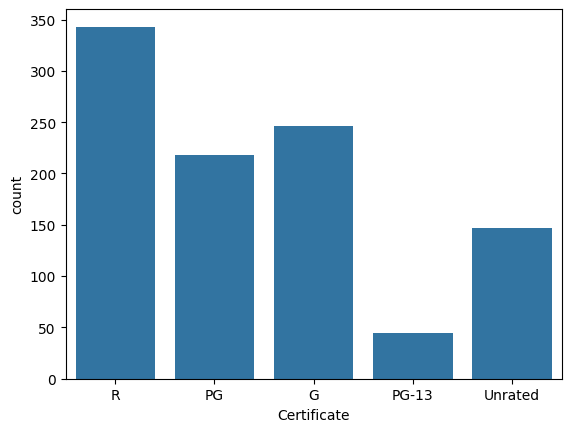

In [39]:
sns.countplot(data=df, x='Certificate')

</br></br>
Com isso, não temos mais valores nulos:</br>

In [40]:
df.isnull().sum()

Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    int64  
 2   Certificate    999 non-null    object 
 3   Runtime        999 non-null    int64  
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     999 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          999 non-null    float64
dtypes: float64(3), int64(3), object(9)
memory usage: 117.2+ KB


In [42]:
df.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,999.00,999.00,999.00,999.00,999.00,999.00
mean,1991.22,122.87,7.95,77.97,271621.42,68082574.10
std,23.30,28.10,0.27,11.37,320912.62,100079288.65
min,1920.00,45.00,7.60,28.00,25088.00,1305.00
25%,1976.00,103.00,7.70,72.00,55471.50,5011838.50
50%,1999.00,119.00,7.90,77.97,138356.00,42438300.00
75%,2009.00,137.00,8.10,85.50,373167.50,68082574.10
max,2020.00,321.00,9.20,100.00,2303232.00,936662225.00


</br></br>

# <b><u>EDA</b></u>

## <u>Analisando Filmes por Gênero</u>:

### Separando e Contando os gêneros:

In [43]:
df['Genre'].value_counts()

Genre
Drama                        84
Drama, Romance               37
Comedy, Drama                35
Comedy, Drama, Romance       31
Action, Crime, Drama         30
                             ..
Action, Adventure, Family     1
Action, Crime, Mystery        1
Animation, Drama, Romance     1
Drama, War, Western           1
Adventure, Comedy, War        1
Name: count, Length: 202, dtype: int64

</br></br>
Filmes podem ter mais de um gênero.</br>
Usei a formula abaixo para contar quantos gêneros um mesmo filme pode ter:</br>

In [44]:
df['Genre'].apply(lambda x: len(x.split(','))).value_counts()

Genre
3    646
2    249
1    104
Name: count, dtype: int64

</br></br>
Com isso confirmamos que existe no máximo 3 gêneros no mesmo filme, separados por vírgula.</br>
Então podemos dividir isso em 3 colunas: Genre1, Genre2, Genre3</br>

In [45]:
# Dividindo a coluna 'Genre' em várias colunas
genre_split = df['Genre'].str.split(',', expand=True)
genre_split.columns = ['Genre1', 'Genre2', 'Genre3']
genre_split[['Genre1', 'Genre2', 'Genre3']] = genre_split.apply(lambda x: x.str.strip())
genre_split

,Genre1,Genre2,Genre3
0,Crime,Drama,None
1,Action,Crime,Drama
2,Crime,Drama,None
3,Crime,Drama,None
4,Action,Adventure,Drama
...,...,...,...
994,Comedy,Drama,Romance
995,Drama,Western,None
996,Drama,Romance,War
997,Drama,War,None


In [46]:
# Adicionando as novas colunas 'Genre1', 'Genre2' e 'Genre3' ao DataFrame original
df = pd.concat([df, genre_split], axis=1)

In [47]:
df.shape

(999, 18)

In [48]:
# Verificar a quantidade de cada gênero:
pd.concat([df['Genre1'], df['Genre2'], df['Genre3']]).dropna().value_counts()

Drama        723
Comedy       233
Crime        209
Adventure    196
Action       189
Thriller     137
Romance      125
Biography    109
Mystery       99
Animation     82
Sci-Fi        67
Fantasy       66
Family        56
History       56
War           51
Music         35
Horror        32
Western       20
Film-Noir     19
Sport         19
Musical       17
Name: count, dtype: int64

In [49]:
concat_Genre = pd.concat([df['Genre1'], df['Genre2'], df['Genre3']]).dropna().to_frame()
concat_Genre.columns = ['Genre_Name']

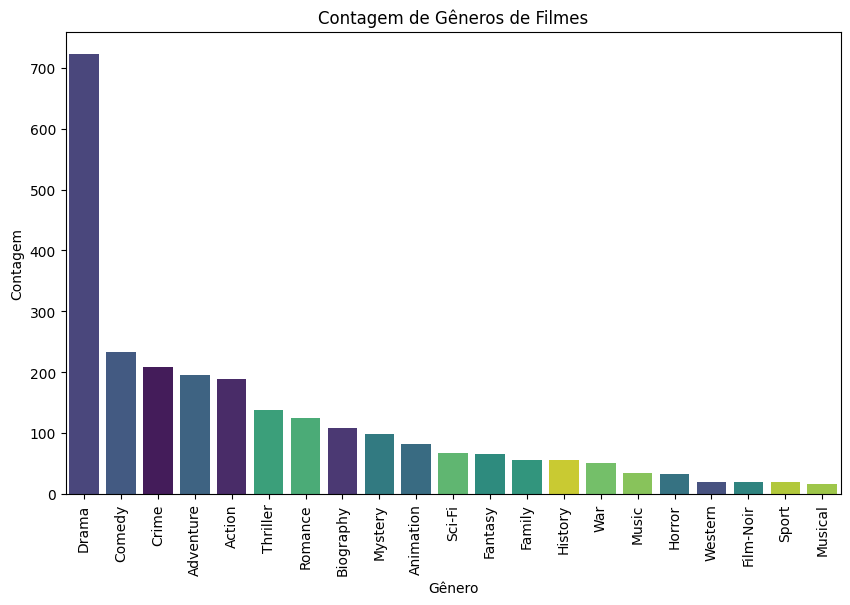

In [50]:
# Visualização dos gêneros mais comuns usando countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=concat_Genre, x='Genre_Name',  order=concat_Genre['Genre_Name'].value_counts().index, palette='viridis', hue='Genre_Name', legend=False)
plt.title('Contagem de Gêneros de Filmes')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.xticks(rotation=90)
plt.show()

</br></br>
É visível uma predominância do gênero <b>Drama</b> no dataframe
</br></br>

### Correlações:

</br>
A seguir, vamos verificar se há uma relação entre o gênero do filme e as avaliações ('IMDB_Rating' e 'Meta_score'). </br>
Além disso, quero investigar uma possível correlação entre gênero e faturamento ('Gross').</br>

In [51]:
df.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2',
       'Star3', 'Star4', 'No_of_Votes', 'Gross', 'Genre1', 'Genre2', 'Genre3'],
      dtype='object')

In [52]:
# Unpivot the genre columns into a single column
df_genre_melt = df.melt(id_vars=['Series_Title', 'IMDB_Rating', 'Meta_score', 'Gross',  'Genre'], value_vars=['Genre1', 'Genre2', 'Genre3'], var_name='GenreType', value_name='Genre_Value')
df_genre_melt.dropna(subset=['Genre_Value'], inplace=True)

In [53]:
df_genre_melt.sort_values(by=['Series_Title'], ascending = True)

,Series_Title,IMDB_Rating,Meta_score,Gross,Genre,GenreType,Genre_Value
1752,(500) Days of Summer,7.70,76.00,32391374.00,"Comedy, Drama, Romance",Genre2,Drama
2751,(500) Days of Summer,7.70,76.00,32391374.00,"Comedy, Drama, Romance",Genre3,Romance
753,(500) Days of Summer,7.70,76.00,32391374.00,"Comedy, Drama, Romance",Genre1,Comedy
3,12 Angry Men,9.00,96.00,4360000.00,"Crime, Drama",Genre1,Crime
1002,12 Angry Men,9.00,96.00,4360000.00,"Crime, Drama",Genre2,Drama
...,...,...,...,...,...,...,...
707,À bout de souffle,7.80,77.97,336705.00,"Crime, Drama",Genre1,Crime
1706,À bout de souffle,7.80,77.97,336705.00,"Crime, Drama",Genre2,Drama
1209,Ôkami kodomo no Ame to Yuki,8.10,71.00,68082574.10,"Animation, Drama, Fantasy",Genre2,Drama
2208,Ôkami kodomo no Ame to Yuki,8.10,71.00,68082574.10,"Animation, Drama, Fantasy",Genre3,Fantasy


In [54]:
# Aplicando One-Hot Encoding
df_genre_ohe = pd.get_dummies(df_genre_melt['Genre_Value'])

In [55]:
# Combinando os gêneros One-Hot Encoded com as colunas de IMDB_Rating, Meta_score e Gross
df_combined = pd.concat([df_genre_melt[['Series_Title', 'IMDB_Rating',  'Meta_score', 'Gross']], df_genre_ohe], axis=1)

In [56]:
# Agrupando por título e tirando a média das colunas de gênero
df_grouped = df_combined.groupby('Series_Title').mean().reset_index()

In [57]:
# Calculando a correlação entre os gêneros e o IMDB_Rating
correlation_matrix = df_grouped.corr(numeric_only=True)
correlation_with_IMDB_Rating = correlation_matrix['IMDB_Rating'].drop(['IMDB_Rating', 'Meta_score', 'Gross'])
correlation_with_Meta_score = correlation_matrix['Meta_score'].drop(['IMDB_Rating', 'Meta_score', 'Gross'])
correlation_with_Gross = correlation_matrix['Gross'].drop(['IMDB_Rating', 'Meta_score', 'Gross'])

#### Correlação entre Gêneros e o IMDB_Rating

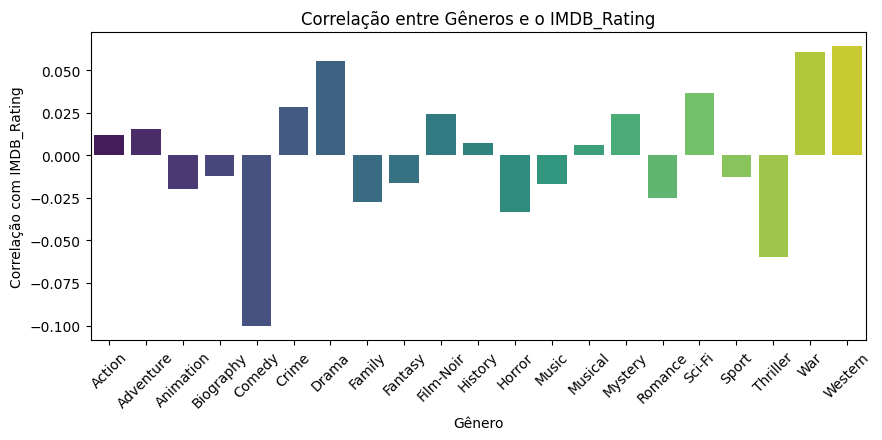

In [58]:
plt.figure(figsize=(10, 4))
barplot = sns.barplot(x=correlation_with_IMDB_Rating.index, y=correlation_with_IMDB_Rating.values, palette='viridis', hue=correlation_with_IMDB_Rating.index, legend=False)
barplot.set_title('Correlação entre Gêneros e o IMDB_Rating')
barplot.set_xlabel('Gênero')
barplot.set_ylabel('Correlação com IMDB_Rating')
barplot.set_xticks(range(len(correlation_with_IMDB_Rating.index)))
barplot.set_xticklabels(correlation_with_IMDB_Rating.index, rotation=45)
plt.show()

In [59]:
correlation_with_IMDB_Rating

Action       0.01
Adventure    0.02
Animation   -0.02
Biography   -0.01
Comedy      -0.10
Crime        0.03
Drama        0.06
Family      -0.03
Fantasy     -0.02
Film-Noir    0.02
History      0.01
Horror      -0.03
Music       -0.02
Musical      0.01
Mystery      0.02
Romance     -0.02
Sci-Fi       0.04
Sport       -0.01
Thriller    -0.06
War          0.06
Western      0.06
Name: IMDB_Rating, dtype: float64

#### Correlação entre Gêneros e Meta_score

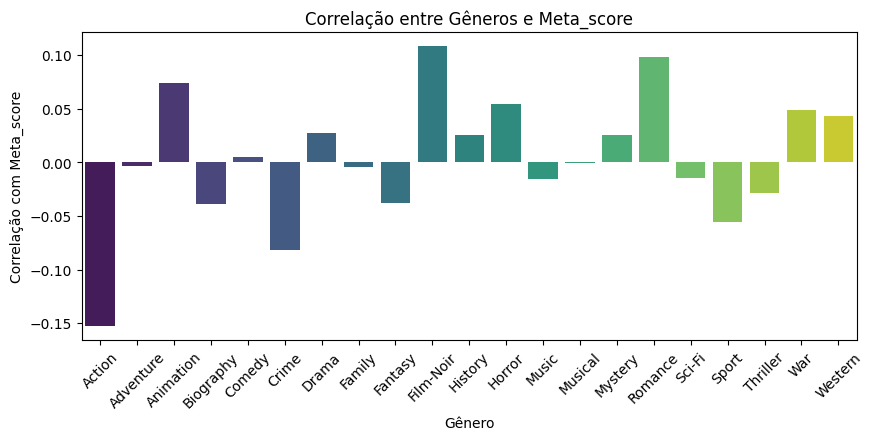

In [60]:
plt.figure(figsize=(10, 4))
barplot = sns.barplot(x=correlation_with_Meta_score.index, y=correlation_with_Meta_score.values, palette='viridis', hue=correlation_with_Meta_score.index, legend=False)
barplot.set_title('Correlação entre Gêneros e Meta_score')
barplot.set_xlabel('Gênero')
barplot.set_ylabel('Correlação com Meta_score')
barplot.set_xticks(range(len(correlation_with_Meta_score.index)))
barplot.set_xticklabels(correlation_with_Meta_score.index, rotation=45)
plt.show()

In [61]:
correlation_with_Meta_score

Action      -0.15
Adventure   -0.00
Animation    0.07
Biography   -0.04
Comedy       0.01
Crime       -0.08
Drama        0.03
Family      -0.00
Fantasy     -0.04
Film-Noir    0.11
History      0.03
Horror       0.05
Music       -0.02
Musical     -0.00
Mystery      0.03
Romance      0.10
Sci-Fi      -0.01
Sport       -0.06
Thriller    -0.03
War          0.05
Western      0.04
Name: Meta_score, dtype: float64

#### Correlação entre Gêneros e Gross

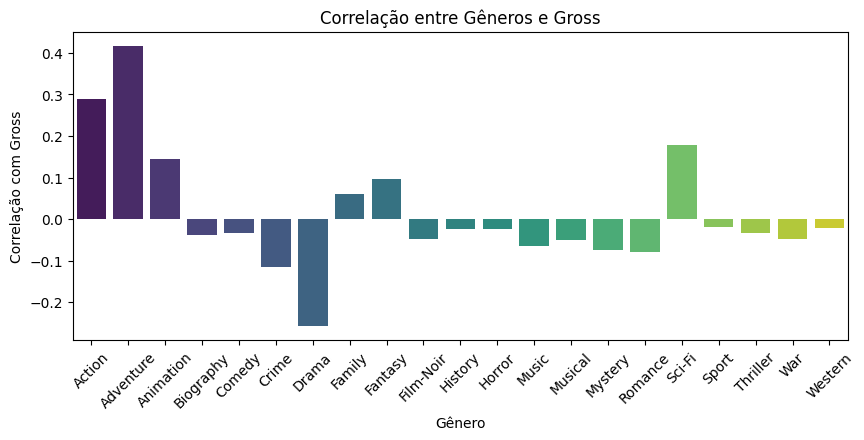

In [62]:
plt.figure(figsize=(10, 4))
barplot = sns.barplot(x=correlation_with_Gross.index, y=correlation_with_Gross.values, palette='viridis', hue=correlation_with_Gross.index, legend=False)
barplot.set_title('Correlação entre Gêneros e Gross')
barplot.set_xlabel('Gênero')
barplot.set_ylabel('Correlação com Gross')
barplot.set_xticks(range(len(correlation_with_Gross.index)))
barplot.set_xticklabels(correlation_with_Gross.index, rotation=45)
plt.show()

In [63]:
correlation_with_Gross

Action       0.29
Adventure    0.42
Animation    0.14
Biography   -0.04
Comedy      -0.03
Crime       -0.12
Drama       -0.26
Family       0.06
Fantasy      0.10
Film-Noir   -0.05
History     -0.02
Horror      -0.02
Music       -0.06
Musical     -0.05
Mystery     -0.08
Romance     -0.08
Sci-Fi       0.18
Sport       -0.02
Thriller    -0.03
War         -0.05
Western     -0.02
Name: Gross, dtype: float64

### Conclusão

Não existe um gênero que apresente uma correlação muito forte (positiva ou negativa) com a nota dos filmes no IMDb, de acordo com esses resultados. A maioria dos gêneros possui correlações baixas ou próximas de zero, o que indica que a qualidade de um filme, medida pela nota no IMDb, não está fortemente ligada ao seu gênero.

O mesmo vale para o Meta_Score. Todos os resultado estão entre -0.15 e 0.10, o que pode ser considerado uma correlação muito fraca com o Gênero.

No caso do faturamento (Gross), podemos dizer que existe correlações positivas significativas com filmes de Ação e Aventura, sugerindo que filmes desses gêneros podem ter bons resultados de bilheteria. Animações e Sci-Fi apresentam uma correlação positiva moderada, indicando que filmes animados e de ficção também podem ser bem sucedidos comercialmente.
É claro que a correlação não implica causalidade. Mas há uma tendência de maiores receitas nesses gêneros.

Já os filmes dramáticos mostram a correlação negativa mais forte com o faturamento entre todos os gêneros listados, e devem exigir estratégias adicionais para garantir sucesso comercial.


</br></br>


## <u>Analisando 'Certificate' (Classificação etária)</u>:

<Axes: xlabel='Certificate', ylabel='count'>

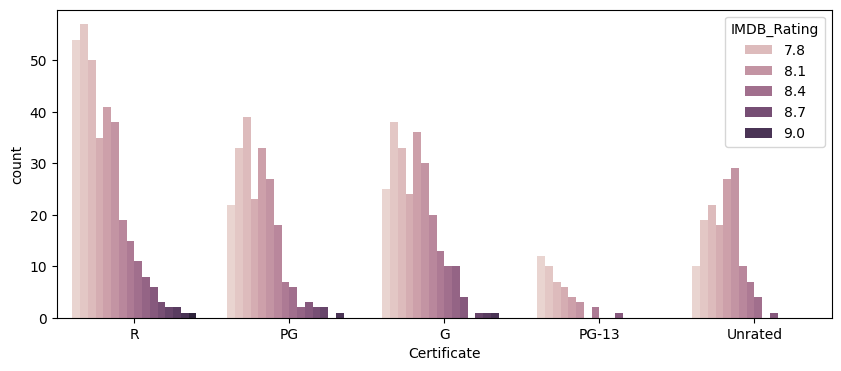

In [64]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Certificate', hue='IMDB_Rating')

<Axes: xlabel='IMDB_Rating', ylabel='count'>

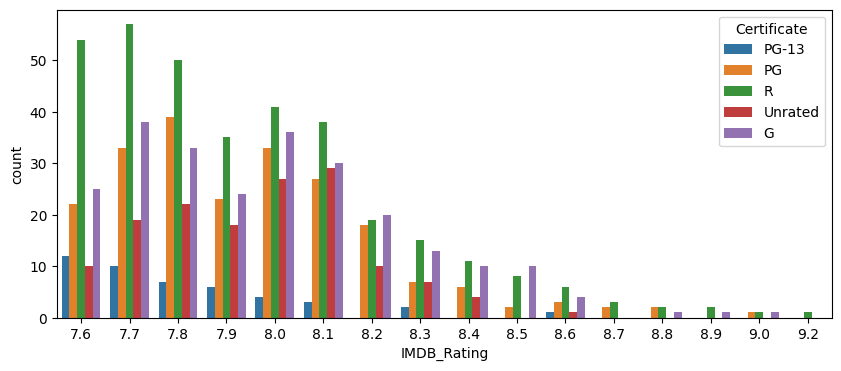

In [65]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='IMDB_Rating', hue='Certificate')

In [66]:
# Aplicando One-Hot Encoding
df_cert_ohe = pd.get_dummies(df['Certificate'])
df_cert_ohe.head()

,G,PG,PG-13,R,Unrated
0,False,False,False,True,False
1,False,True,False,False,False
2,False,False,False,True,False
3,True,False,False,False,False
4,True,False,False,False,False


In [67]:
# Combinando as classificações One-Hot Encoded com a coluna de IMDB_Rating, Meta_score e Gross
df_cert_combined = pd.concat([df[['Series_Title', 'IMDB_Rating',  'Meta_score', 'Gross']], df_cert_ohe], axis=1)
df_cert_combined.head()

,Series_Title,IMDB_Rating,Meta_score,Gross,G,PG,PG-13,R,Unrated
0,The Godfather,9.20,100.00,134966411.00,False,False,False,True,False
1,The Dark Knight,9.00,84.00,534858444.00,False,True,False,False,False
2,The Godfather: Part II,9.00,90.00,57300000.00,False,False,False,True,False
3,12 Angry Men,9.00,96.00,4360000.00,True,False,False,False,False
4,The Lord of the Rings: The Return of the King,8.90,94.00,377845905.00,True,False,False,False,False


In [68]:
# Calculando a correlação entre as classificações e o IMDB_Rating
correlation_matrix = df_cert_combined.corr(numeric_only=True)
correlation_matrix

,IMDB_Rating,Meta_score,Gross,G,PG,PG-13,R,Unrated
IMDB_Rating,1.00,0.26,0.09,0.06,0.00,-0.11,-0.02,0.01
Meta_score,0.26,1.00,-0.03,0.05,-0.06,-0.03,-0.09,0.14
Gross,0.09,-0.03,1.00,0.08,0.21,-0.06,-0.14,-0.14
G,0.06,0.05,0.08,1.00,-0.30,-0.12,-0.41,-0.24
PG,0.00,-0.06,0.21,-0.30,1.00,-0.11,-0.38,-0.22
PG-13,-0.11,-0.03,-0.06,-0.12,-0.11,1.00,-0.16,-0.09
R,-0.02,-0.09,-0.14,-0.41,-0.38,-0.16,1.00,-0.30
Unrated,0.01,0.14,-0.14,-0.24,-0.22,-0.09,-0.30,1.00


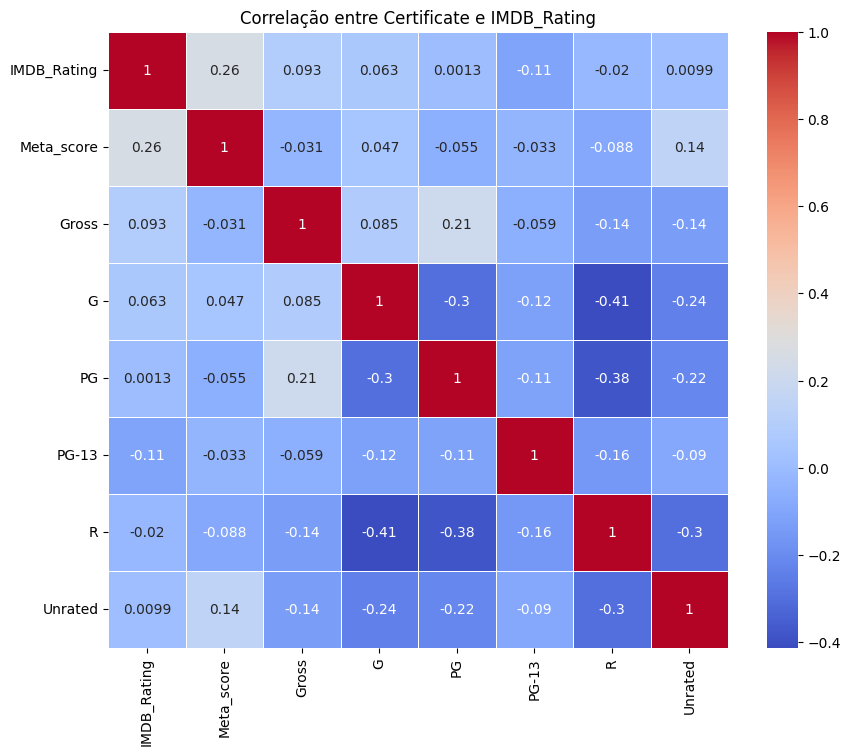

In [69]:
# Visualização da correlação usando heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlação entre Certificate e IMDB_Rating')
plt.show()

In [70]:
correlation_with_IMDB_Rating = correlation_matrix['IMDB_Rating'].drop(['IMDB_Rating', 'Meta_score', 'Gross'])
correlation_with_Meta_score = correlation_matrix['Meta_score'].drop(['IMDB_Rating', 'Meta_score', 'Gross'])
correlation_with_Gross = correlation_matrix['Gross'].drop(['IMDB_Rating', 'Meta_score', 'Gross'])

In [71]:
print()
print('Correlação entre Certificate e IMDB_Rating')
print(correlation_with_IMDB_Rating)
print()
print('Correlação entre Certificate e Meta_score')
print(correlation_with_Meta_score)
print()
print('Correlação entre Certificate e Gross')
print(correlation_with_Gross)
print()


Correlação entre Certificate e IMDB_Rating
G          0.06
PG         0.00
PG-13     -0.11
R         -0.02
Unrated    0.01
Name: IMDB_Rating, dtype: float64

Correlação entre Certificate e Meta_score
G          0.05
PG        -0.06
PG-13     -0.03
R         -0.09
Unrated    0.14
Name: Meta_score, dtype: float64

Correlação entre Certificate e Gross
G          0.08
PG         0.21
PG-13     -0.06
R         -0.14
Unrated   -0.14
Name: Gross, dtype: float64



### Conclusão

Não encontrei nenhuma correlação significativa entre a classificação etária e as notas dos filmes (IMDB_Rating ou Meta_score).

Há uma pequena correlação positiva entre a classificação 'PG' e o faturamento ('Gross'), o que pode indicar que filmes voltados para o público em geral, mas não especificamente infantis, tendem a ter uma bilheteria maior.


</br></br>

## <u>Analisando Diretor e Atores</u>:

### Diretor

In [72]:
# Quantidade de Filmes por diretor
director_count = df.groupby('Director')['IMDB_Rating'].count().reset_index()
director_count.sort_values(by='IMDB_Rating', ascending=False)

,Director,IMDB_Rating
22,Alfred Hitchcock,14
470,Steven Spielberg,13
179,Hayao Miyazaki,11
9,Akira Kurosawa,10
313,Martin Scorsese,10
...,...,...
511,Troy Duffy,1
512,Tyler Nilson,1
513,Umesh Shukla,1
1,Aaron Sorkin,1


In [73]:
# Calcular a média das notas por diretor
director_ratings = df.groupby('Director')['IMDB_Rating'].mean().reset_index()
director_ratings.sort_values(by='IMDB_Rating', ascending=False)

,Director,IMDB_Rating
284,Lana Wachowski,8.70
191,Irvin Kershner,8.70
492,Thomas Kail,8.60
316,Masaki Kobayashi,8.60
427,Roberto Benigni,8.60
...,...,...
59,Bradley Cooper,7.60
503,Tom Tykwer,7.60
498,Todd Haynes,7.60
506,Tony Bancroft,7.60


In [74]:
# Selecionar os 10 diretores com o maior numero de Filmes
most_seen_directors = director_count.nlargest(10, 'IMDB_Rating')

# Selecionar os 10 diretores com as maiores médias de notas
top_10_directors = director_ratings.nlargest(10, 'IMDB_Rating')

# Selecionar os 10 diretores com as menores médias de notas
bottom_10_directors = director_ratings.nsmallest(10, 'IMDB_Rating')

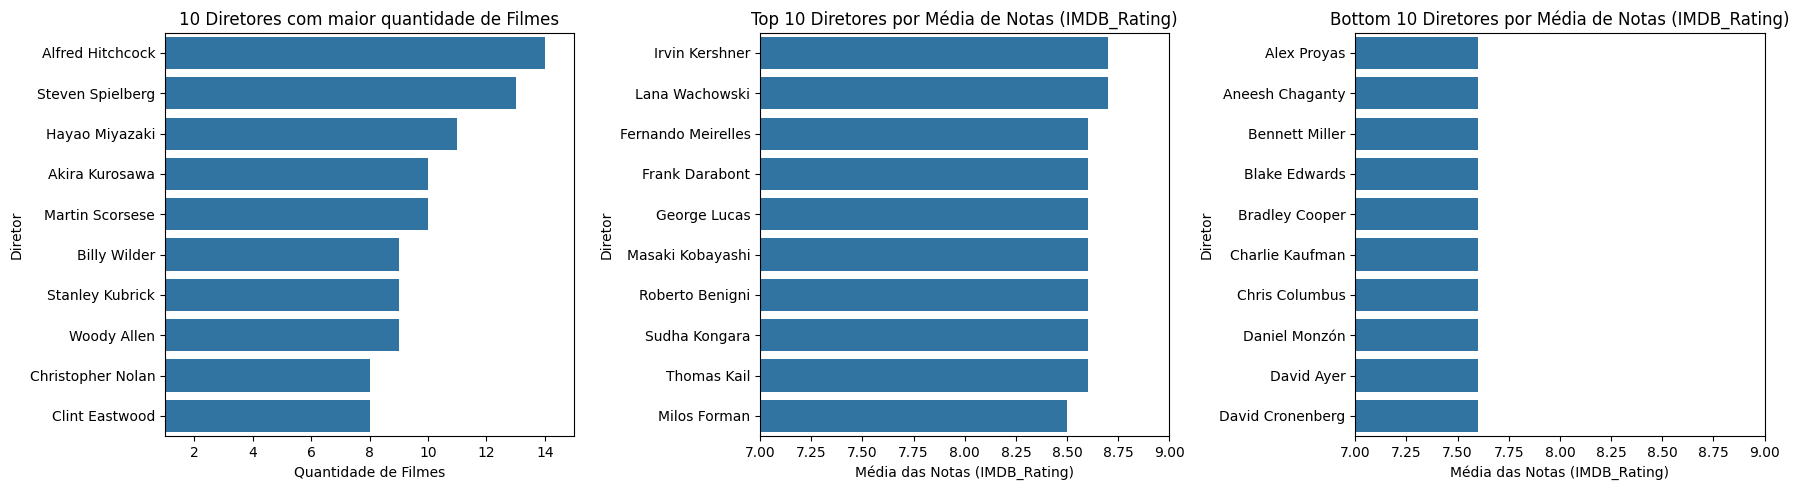

In [75]:
# Criar a figura e os eixos para os dois gráficos
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gráfico dos 10 diretores com mais Filmes
sns.barplot(x='IMDB_Rating', y='Director', data=most_seen_directors, ax=axes[0])
axes[0].set_title('10 Diretores com maior quantidade de Filmes')
axes[0].set_xlabel('Quantidade de Filmes')
axes[0].set_ylabel('Diretor')
axes[0].set_xlim(1, 15)

# Gráfico dos top 10 diretores
sns.barplot(x='IMDB_Rating', y='Director', data=top_10_directors, ax=axes[1])
axes[1].set_title('Top 10 Diretores por Média de Notas (IMDB_Rating)')
axes[1].set_xlabel('Média das Notas (IMDB_Rating)')
axes[1].set_ylabel('Diretor')
axes[1].set_xlim(7, 9)

# Gráfico dos bottom 10 diretores
sns.barplot(x='IMDB_Rating', y='Director', data=bottom_10_directors, ax=axes[2])
axes[2].set_title('Bottom 10 Diretores por Média de Notas (IMDB_Rating)')
axes[2].set_xlabel('Média das Notas (IMDB_Rating)')
axes[2].set_ylabel('Diretor')
axes[2].set_xlim(7, 9)

# Ajustar layout
plt.tight_layout()
plt.show()

</br></br>

### Atores

In [76]:
# Unpivot dos atores
actors = df.melt(id_vars=['IMDB_Rating', 'Gross'], value_vars=['Star1', 'Star2', 'Star3', 'Star4'], var_name='Star_Role', value_name='Actor')

In [77]:
# Quantidade de Filmes por ator
actor_count = actors.groupby('Actor')['IMDB_Rating'].count().reset_index()
actor_count.sort_values(by='IMDB_Rating', ascending=False)

,Actor,IMDB_Rating
2134,Robert De Niro,17
2497,Tom Hanks,14
35,Al Pacino,13
294,Brad Pitt,12
470,Clint Eastwood,12
...,...,...
387,Celia Johnson,1
388,Celile Toyon Uysal,1
48,Albert Rémy,1
49,Alberto Ammann,1


In [78]:
# Calcular a média das notas por ator
actor_ratings = actors.groupby('Actor')['IMDB_Rating'].mean().reset_index()
actor_ratings.sort_values(by='IMDB_Rating', ascending=False)

,Actor,IMDB_Rating
2,Aaron Eckhart,9.00
1263,John Travolta,8.90
367,Caroline Goodall,8.90
50,Aldo Giuffrè,8.80
679,Elliot Page,8.80
...,...,...
1939,Pascal Benezech,7.60
1940,Pascal Greggory,7.60
1991,Peter Dinklage,7.60
331,Buddy Ebsen,7.60


In [79]:
# Selecionar os 10 Atores com o maior numero de Filmes
most_seen_actors = actor_count.nlargest(20, 'IMDB_Rating')

# Selecionar os 10 Atores com as maiores médias de notas
top_20_actors = actor_ratings.nlargest(20, 'IMDB_Rating')

# Selecionar os 10 Atores com as menores médias de notas
bottom_20_actors = actor_ratings.nsmallest(20, 'IMDB_Rating')

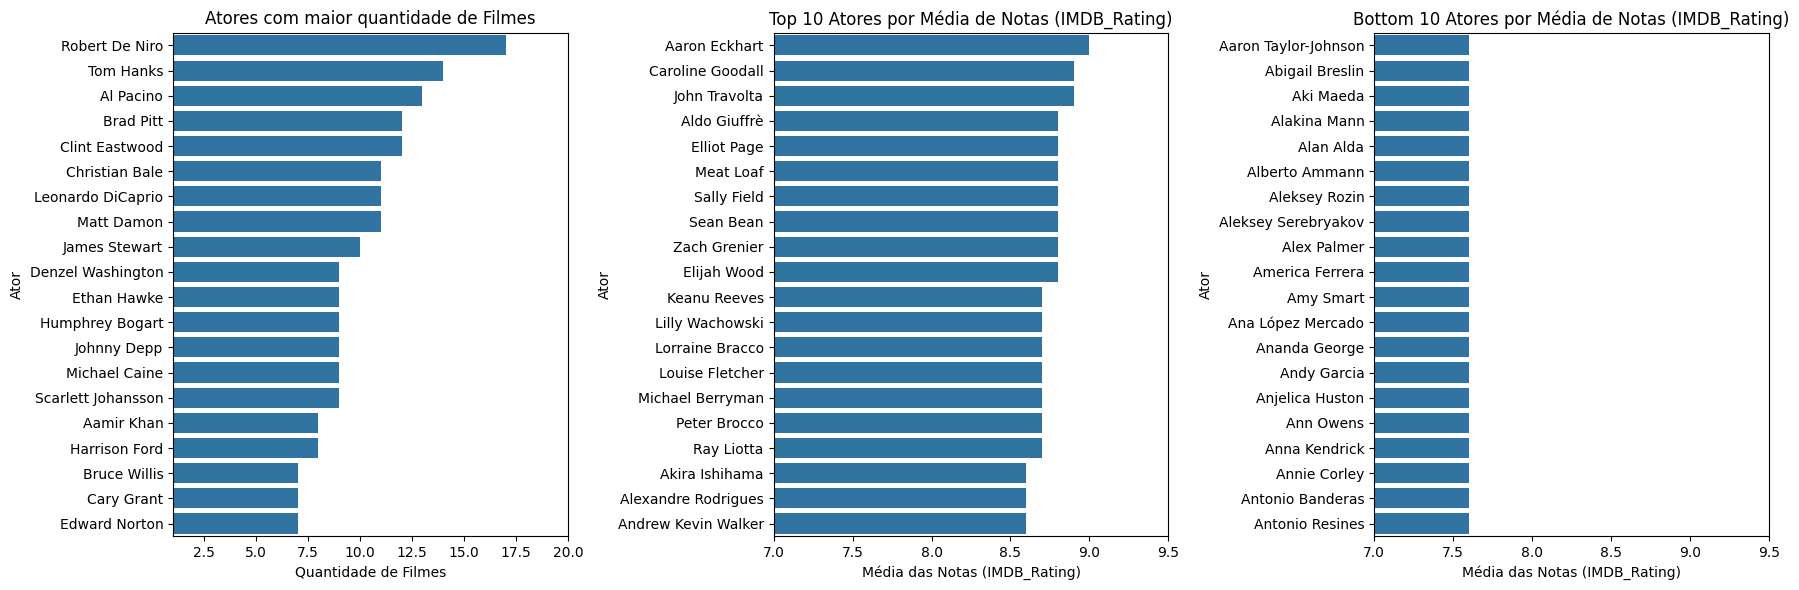

In [80]:
# Criar a figura e os eixos para os dois gráficos
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico dos 10 diretores com mais Filmes
sns.barplot(x='IMDB_Rating', y='Actor', data=most_seen_actors, ax=axes[0])
axes[0].set_title('Atores com maior quantidade de Filmes')
axes[0].set_xlabel('Quantidade de Filmes')
axes[0].set_ylabel('Ator')
axes[0].set_xlim(1, 20)

# Gráfico dos top 10 diretores
sns.barplot(x='IMDB_Rating', y='Actor', data=top_20_actors, ax=axes[1])
axes[1].set_title('Top 10 Atores por Média de Notas (IMDB_Rating)')
axes[1].set_xlabel('Média das Notas (IMDB_Rating)')
axes[1].set_ylabel('Ator')
axes[1].set_xlim(7, 9.5)

# Gráfico dos bottom 10 diretores
sns.barplot(x='IMDB_Rating', y='Actor', data=bottom_20_actors, ax=axes[2])
axes[2].set_title('Bottom 10 Atores por Média de Notas (IMDB_Rating)')
axes[2].set_xlabel('Média das Notas (IMDB_Rating)')
axes[2].set_ylabel('Ator')
axes[2].set_xlim(7, 9.5)

# Ajustar layout
plt.tight_layout()
plt.show()

</br></br>

### Diretor e Atores vs Gross

In [81]:
# Calcular a média do Faturamento por diretor
director_gross = df.groupby('Director')['Gross'].mean().reset_index()
director_gross.sort_values(by='Gross', ascending=False)

,Director,Gross
36,Anthony Russo,551259850.75
148,Gareth Edwards,532177324.00
195,J.J. Abrams,474390301.67
261,Josh Cooley,434038008.00
428,Roger Allers,422783777.00
...,...,...
516,Vikramaditya Motwane,7461.00
224,Jeong-beom Lee,6460.00
197,Jaco Van Dormael,3600.00
491,Thomas Jahn,3296.00


In [82]:
# Calcular a média das Faturamento por ator
actor_gross = actors.groupby('Actor')['Gross'].mean().reset_index()
actor_gross.sort_values(by='Gross', ascending=False)

,Actor,Gross
1214,John Boyega,936662225.00
494,Daisy Ridley,936662225.00
1781,Michelle Rodriguez,760507625.00
270,Billy Zane,659325379.00
2272,Sarah Vowell,608581744.00
...,...,...
2269,Sarah Polley,3600.00
2464,Thierry van Werveke,3296.00
2475,Til Schweiger,3296.00
1076,Jan Josef Liefers,3296.00


</br></br>

### Conclusão

A direção e o elenco influenciam consideravelmente na avaliação e na bilheteria dos filmes, sendo fundamental considerá-los durante a etapa de machine learning.


</br></br>

## <u>Analisando a coluna Overview</u>:

### Identificando Palavras e Temas Mais Comuns:

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [84]:
# TF-IDF para extrair palavras mais importantes
tfidf = TfidfVectorizer(stop_words='english', max_features=30)
tfidf_matrix = tfidf.fit_transform(df['Overview'])
tfidf_feature_names = tfidf.get_feature_names_out()

In [85]:
# Somar as pontuações TF-IDF para cada palavra
tfidf_scores = tfidf_matrix.sum(axis=0).A1
tfidf_scores_df = pd.DataFrame({'Term': tfidf_feature_names, 'Score': tfidf_scores})

In [86]:
# Ordenar por pontuação
tfidf_scores_df = tfidf_scores_df.sort_values(by='Score', ascending=False)

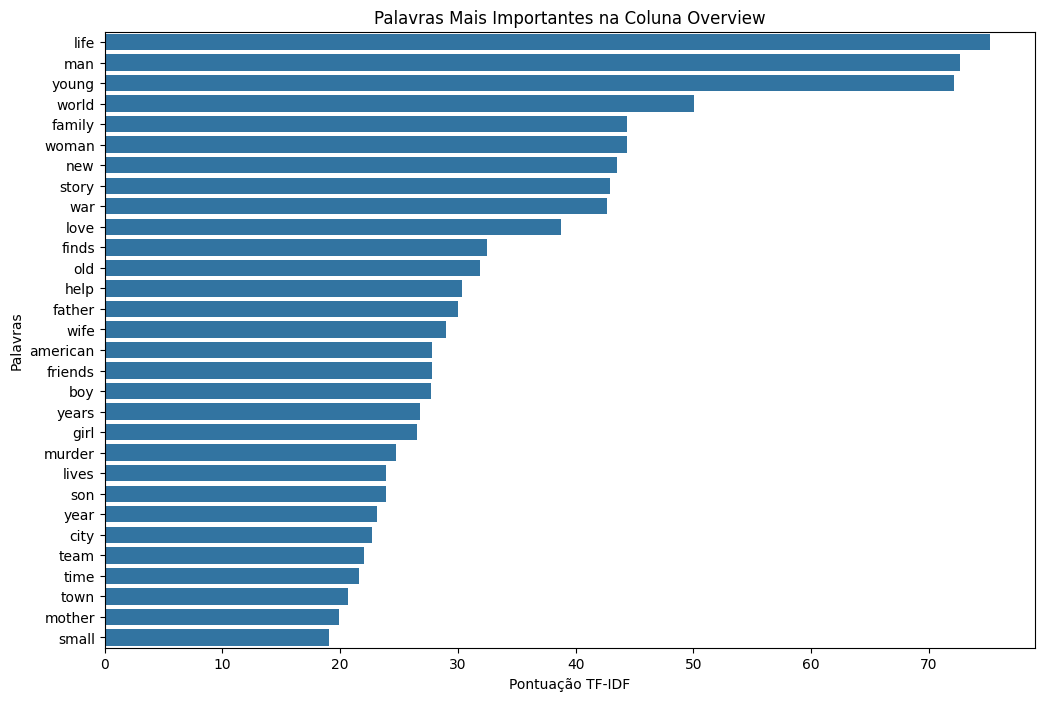

In [87]:
# Visualizar palavras mais importantes
plt.figure(figsize=(12, 8))
sns.barplot(x='Score', y='Term', data=tfidf_scores_df)
plt.title('Palavras Mais Importantes na Coluna Overview')
plt.xlabel('Pontuação TF-IDF')
plt.ylabel('Palavras')
plt.show()

In [88]:
# TF-IDF para extrair bigramas e trigramas mais importantes
tfidf = TfidfVectorizer(stop_words='english', ngram_range=(2, 3), max_features=30)
tfidf_matrix = tfidf.fit_transform(df['Overview'])
tfidf_feature_names = tfidf.get_feature_names_out()

In [89]:
# Somar as pontuações TF-IDF para cada n-grama
tfidf_scores = tfidf_matrix.sum(axis=0).A1
tfidf_scores_df = pd.DataFrame({'Term': tfidf_feature_names, 'Score': tfidf_scores})

In [90]:
# Ordenar por pontuação
tfidf_scores_df = tfidf_scores_df.sort_values(by='Score', ascending=False)

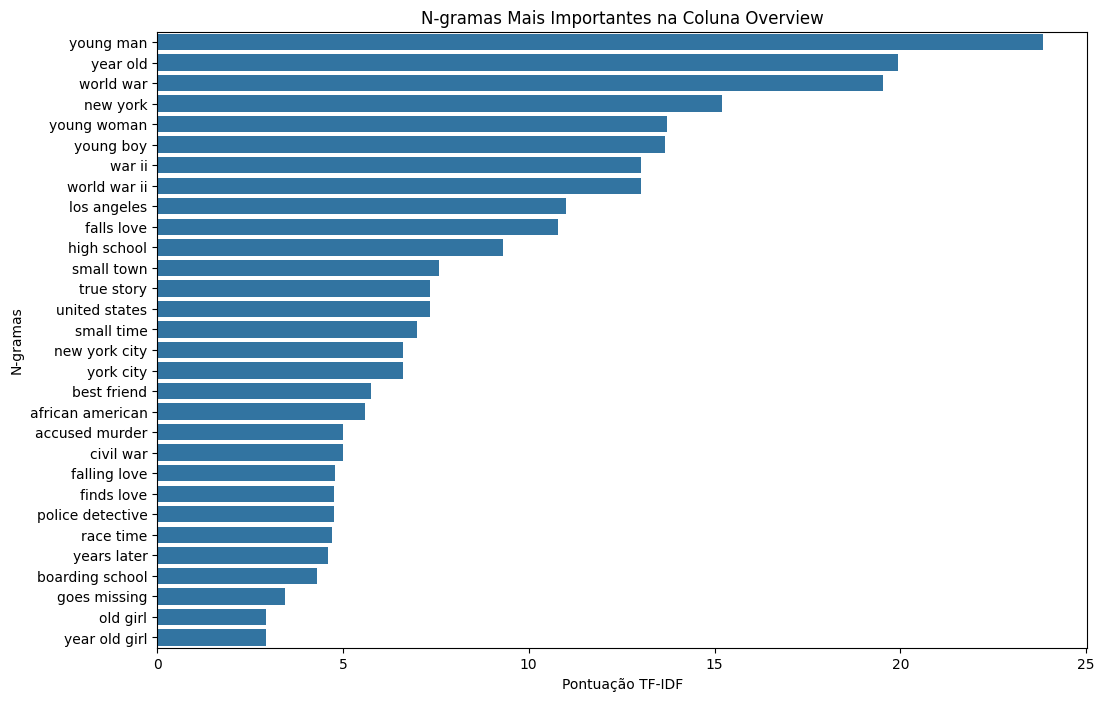

In [91]:
# Visualizar n-gramas mais importantes
plt.figure(figsize=(12, 8))
sns.barplot(x='Score', y='Term', data=tfidf_scores_df)
plt.title('N-gramas Mais Importantes na Coluna Overview')
plt.xlabel('Pontuação TF-IDF')
plt.ylabel('N-gramas')
plt.show()

In [92]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [93]:
# CountVectorizer para preparar dados para LDA
count_vectorizer = CountVectorizer(stop_words='english')
count_matrix = count_vectorizer.fit_transform(df['Overview'])

In [94]:
# LDA para identificar temas
lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(count_matrix)

LatentDirichletAllocation(n_components=2, random_state=42)

In [95]:
# Palavras mais importantes para cada tema
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [96]:
# Display topics
no_top_words = 20
display_topics(lda, count_vectorizer.get_feature_names_out(), no_top_words)

Topic 1:
life young man new woman world old love boy story family father years year school finds small girl crime time
Topic 2:
war young world man family wife story help american son love murder new woman finds ii friends girl life german


</br></br>

### Inferindo o gênero do filme a partir da coluna Overview:

</br>
É possível sim inferir o gênero do filme a partir da coluna "Overview" utilizando técnicas de processamento de linguagem natural (NLP).
</br></br>
Para isso vamos criar um pipeline que transforma as descrições dos filmes em representações TF-IDF e, em seguida, treinar um classificador Naive Bayes.</br>

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [98]:
df['Genre1'].value_counts()

Genre1
Drama        288
Action       172
Comedy       155
Crime        107
Biography     88
Animation     82
Adventure     72
Mystery       12
Horror        11
Western        4
Film-Noir      3
Fantasy        2
Family         2
Thriller       1
Name: count, dtype: int64

</br></br>
Existe um desbalanceamento nos dados onde 'Drama' é o gênero mais comum, e isso vai afetar o treinamento do modelo.
</br></br>
Para lidar com esse problema, vamos separar uma amostra menor do dataset, com quantidades proporcionais de cada gênero:</br>

In [99]:
# Determinar o número de samples por gênero
n_samples_per_genre = 10

# Pegar samples proporcionais
balanced_sample = df.groupby('Genre1').apply(lambda x: x.sample(n=n_samples_per_genre, replace=True)).reset_index(drop=True)


C:\Users\Giovanni\AppData\Local\Temp\ipykernel_18684\941697708.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_sample = df.groupby('Genre1').apply(lambda x: x.sample(n=n_samples_per_genre, replace=True)).reset_index(drop=True)


In [100]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(balanced_sample['Overview'], balanced_sample['Genre1'], test_size=0.2, random_state=42)

In [101]:
# Criar um pipeline com TF-IDF e Naive Bayes classifier
genre_predict_model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [102]:
# Treinar o modelo
genre_predict_model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [103]:
# Avaliar o modelo
accuracy = genre_predict_model.score(X_test, y_test)
print(f"Model accuracy: {accuracy:.2f}")

Model accuracy: 0.43


In [104]:
# Lista de descrições para testar:
new_overviews = [
    "A young boy discovers he has magical powers and must attend a school for wizards.",
    "A group of friends embarks on a journey to destroy a powerful ring and save Middle-earth.",
    "Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.",
    "A mockumentary on a group of typical office workers.",
    "The fractured domestic lives of a nihilistic mad scientist and his anxious grandson are further complicated by their inter-dimensional misadventures.",
    "When a novice sleuth convinces the police he has psychic powers, he and his reluctant best friend are hired on as consultants to help solve complicated cases.",
    "Monkey D. Luffy sets off on an adventure with his pirate crew in hopes of finding the greatest treasure ever",
    "A young chef from the fine dining world returns to Chicago to run his family's sandwich shop"
]

In [105]:
# Prever gêneros para novas descrições:
predicted_Genre = genre_predict_model.predict(new_overviews)

In [106]:
# Resultado
print()
print("Predicted Genre for new overviews:", predicted_Genre)
print()


Predicted Genre for new overviews: ['Comedy' 'Family' 'Comedy' 'Family' 'Crime' 'Film-Noir' 'Action' 'Comedy']



### Conclusão


Relação com a Nota do IMDB:

    A presença de certos termos ou temas nos resumos pode estar correlacionada com a nota do IMDB. Filmes com descrições detalhadas e envolventes podem tender a ter notas mais altas.
    
    No entanto, para determinar essa relação de forma mais robusta, será necessário treinar um modelo de machine learning com a coluna Overview incluída como uma feature.

Inferindo o gênero do filme:

    É sim possível sim inferir o gênero do filme a partir da coluna "Overview" utilizando técnicas de processamento de linguagem natural (NLP).

</br></br>

## <u>Analisando as outras colunas</u>:

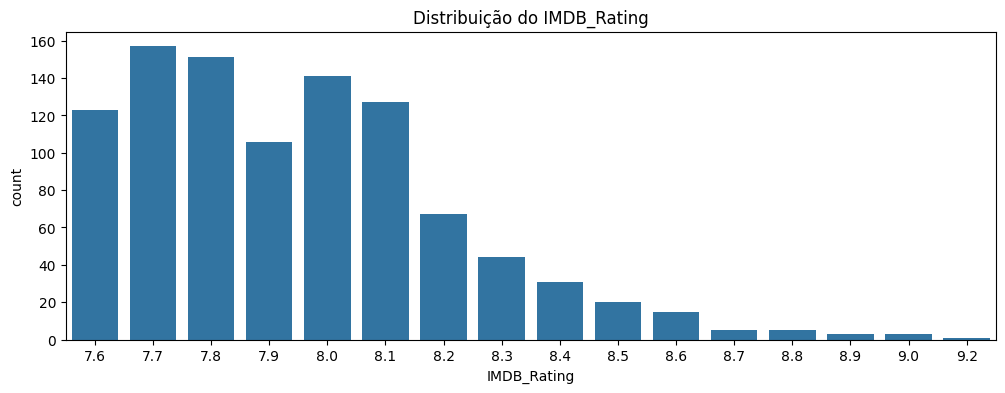

In [107]:
# Distribuição do IMDB_Rating
plt.figure(figsize=(12, 4))
plt.title("Distribuição do IMDB_Rating")
sns.countplot(data=df, x='IMDB_Rating')
plt.show()

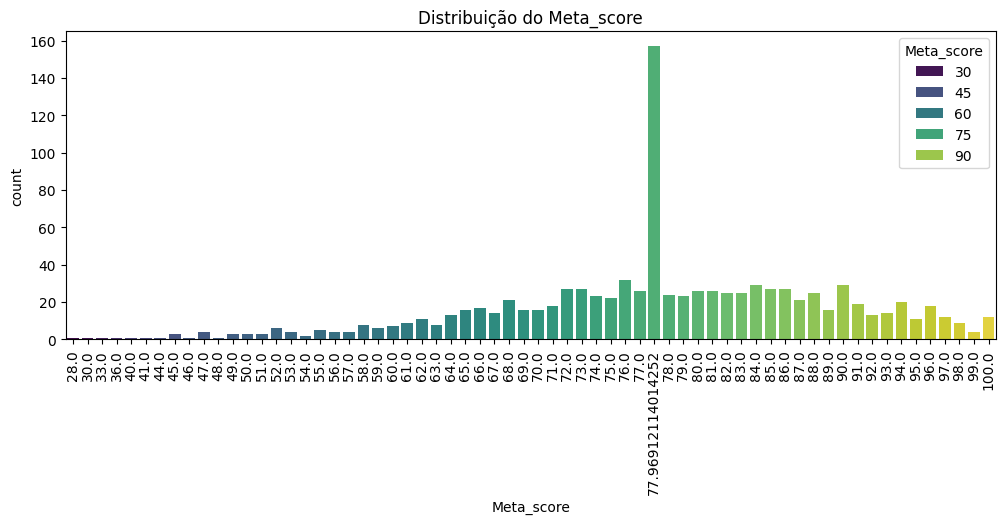

In [108]:
# Distribuição do Meta_score
plt.figure(figsize=(12, 4))
plt.title("Distribuição do Meta_score")
plt.xticks(rotation=90)
sns.countplot(data=df, x='Meta_score', palette='viridis', hue='Meta_score')
plt.show()

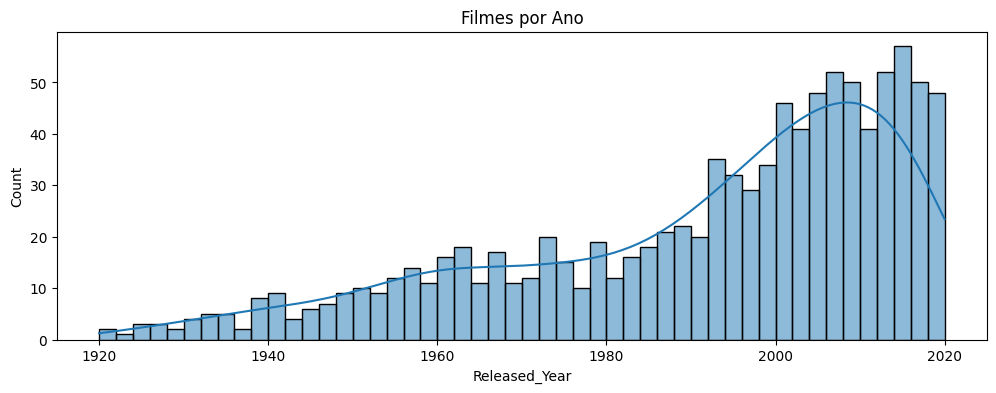

In [109]:
#Filmes por ano
plt.figure(figsize=(12, 4))
plt.title("Filmes por Ano")
sns.histplot(data=df, x='Released_Year', bins=50, kde=True)
plt.show()

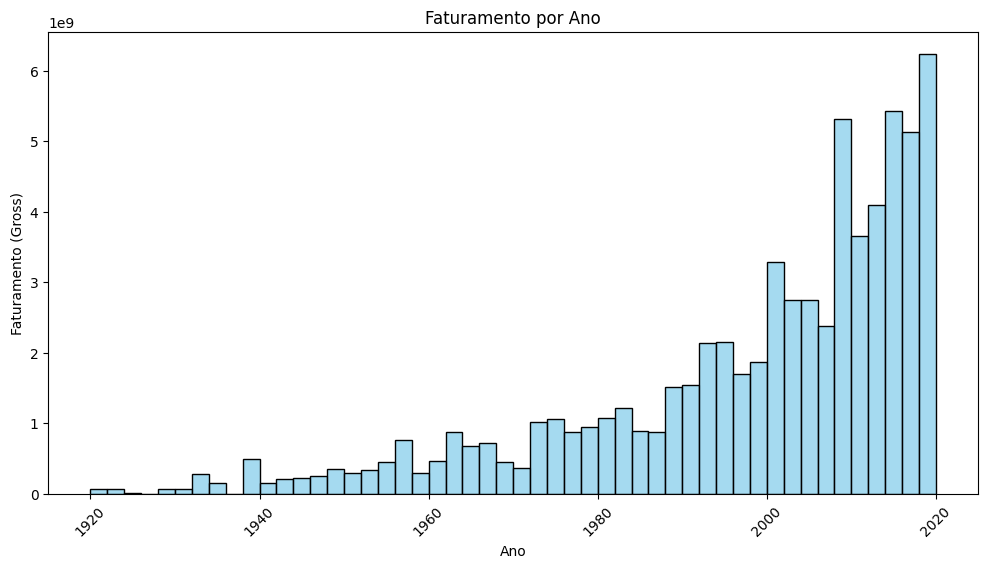

In [110]:
#Faturamento por ano

# Agrupar os dados por ano e somar os faturamentos
yearly_gross = df.groupby('Released_Year')['Gross'].sum().reset_index()
# Criar o gráfico
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Released_Year', weights='Gross', bins=50, kde=False, color='skyblue')
plt.title('Faturamento por Ano')
plt.xlabel('Ano')
plt.ylabel('Faturamento (Gross)')
plt.xticks(rotation=45)
plt.show()

</br></br>
Vou user uma pairplot para observar a relação entre pares de variáveis

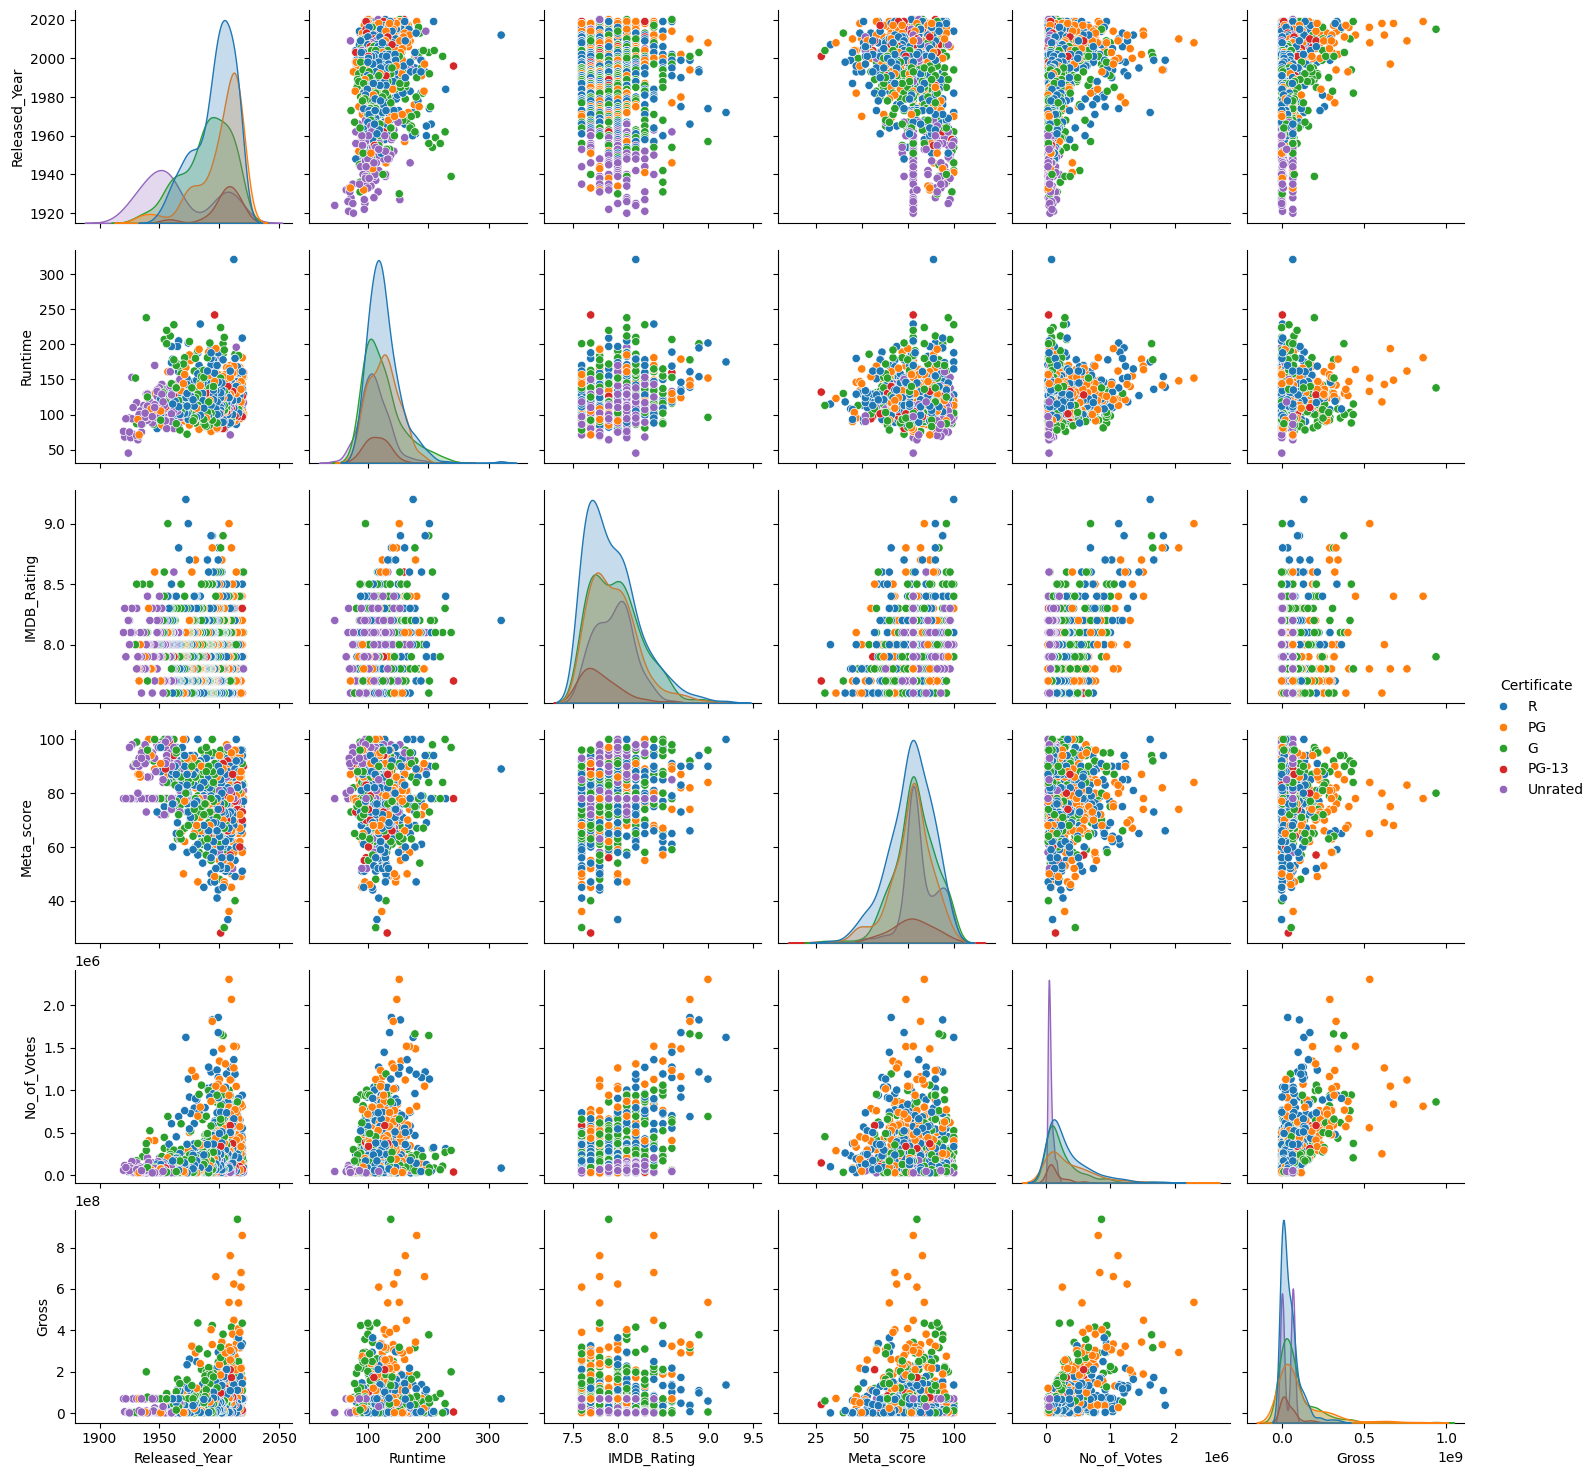

In [111]:
sns.pairplot(df, hue='Certificate')

In [112]:
df.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,999.00,999.00,999.00,999.00,999.00,999.00
mean,1991.22,122.87,7.95,77.97,271621.42,68082574.10
std,23.30,28.10,0.27,11.37,320912.62,100079288.65
min,1920.00,45.00,7.60,28.00,25088.00,1305.00
25%,1976.00,103.00,7.70,72.00,55471.50,5011838.50
50%,1999.00,119.00,7.90,77.97,138356.00,42438300.00
75%,2009.00,137.00,8.10,85.50,373167.50,68082574.10
max,2020.00,321.00,9.20,100.00,2303232.00,936662225.00


In [113]:
df.corr(numeric_only=True)

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
Released_Year,1.00,0.17,-0.13,-0.29,0.25,0.19
Runtime,0.17,1.00,0.24,-0.03,0.17,0.12
IMDB_Rating,-0.13,0.24,1.00,0.26,0.48,0.09
Meta_score,-0.29,-0.03,0.26,1.00,-0.02,-0.03
No_of_Votes,0.25,0.17,0.48,-0.02,1.00,0.56
Gross,0.19,0.12,0.09,-0.03,0.56,1.00


<Axes: >

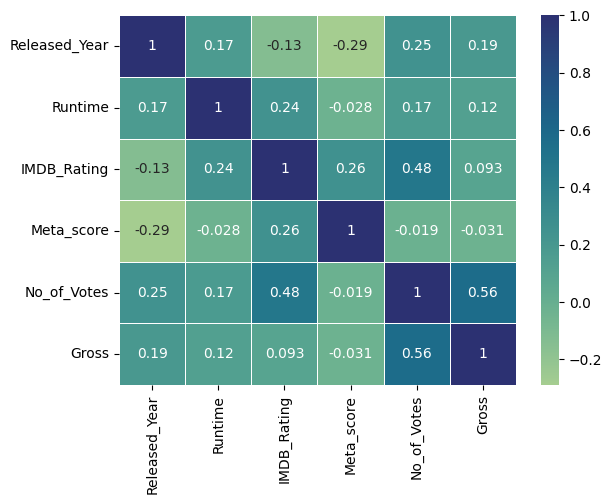

In [114]:
sns.heatmap(df.corr(numeric_only=True),annot =True,cmap = 'crest',linewidth=0.5)

### Analizando a correlação entre as variáveis:

Released_Year e outras variáveis:

    Runtime (0.17): Existe uma correlação positiva fraca entre o ano de lançamento e a duração do filme. Filmes mais recentes podem ter tendência a ter durações diferentes em comparação com filmes mais antigos.
        
    IMDB_Rating (-0.13): Há uma correlação negativa fraca entre o ano de lançamento e a nota do IMDB. Isso sugere que filmes mais antigos podem ter notas ligeiramente mais altas, mas essa correlação é bastante fraca.
        
    Meta_score (-0.29): Existe uma correlação negativa moderada entre o ano de lançamento e a pontuação no Meta_score. Isso pode indicar que filmes mais antigos tendem a ter pontuações no Metascore mais baixas.

Runtime e outras variáveis:

    IMDB_Rating (0.24): Há uma correlação positiva fraca entre a duração do filme e a nota do IMDB. Filmes com durações mais longas podem ter uma tendência ligeiramente maior de ter notas mais altas.
        
    No_of_Votes (0.17): Existe uma correlação positiva fraca entre a duração do filme e o número de votos recebidos no IMDB. Filmes mais longos podem atrair mais espectadores e, portanto, receber mais votos.

IMDB_Rating e outras variáveis:

    No_of_Votes (0.48): Há uma correlação moderada positiva entre a nota do IMDB e o número de votos recebidos. Filmes com notas mais altas tendem a receber mais votos.
        
    Gross (0.09): Existe uma correlação muito fraca entre a nota do IMDB e o faturamento bruto. Isso sugere que a nota do IMDB não está fortemente associada ao sucesso financeiro do filme.

Meta_score e outras variáveis:

    No_of_Votes (-0.02) e Gross (-0.03): A correlação entre o Meta_score e o número de votos recebidos, assim como o faturamento bruto, é muito próxima de zero. Isso indica que a pontuação no Metascore não está correlacionada com a popularidade ou o sucesso financeiro do filme.

No_of_Votes e Gross:

    Gross (0.56): Existe uma correlação moderada positiva entre o número de votos recebidos e o faturamento bruto do filme. Filmes que recebem mais votos tendem a ter uma bilheteria mais alta.

</br></br>

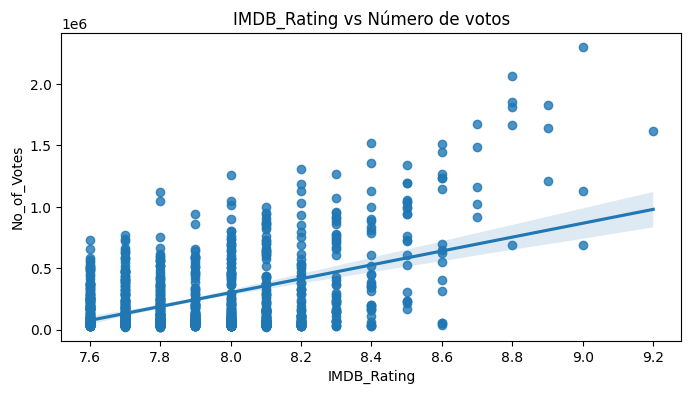

In [115]:
# IMDB_Rating vs Número de votos
plt.figure(figsize=(8, 4))
plt.title("IMDB_Rating vs Número de votos")
sns.regplot(data=df, x='IMDB_Rating', y='No_of_Votes')
plt.show()

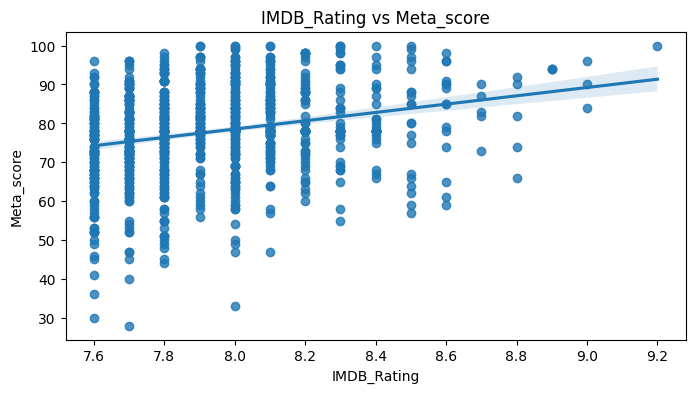

In [116]:
# IMDB_Rating vs Meta_score
plt.figure(figsize=(8, 4))
plt.title("IMDB_Rating vs Meta_score")
sns.regplot(data=df, x='IMDB_Rating', y='Meta_score')
plt.show()

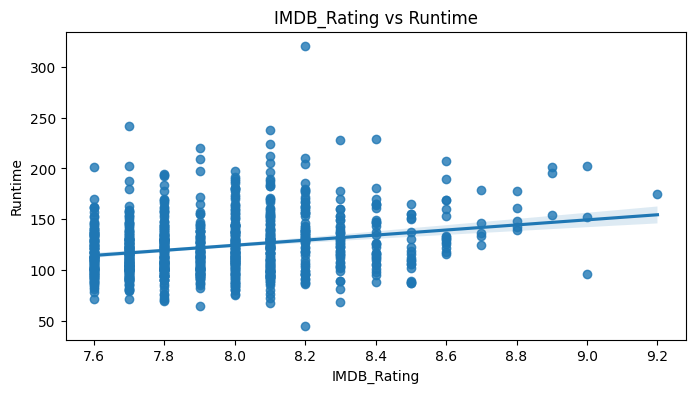

In [117]:
# IMDB_Rating vs Runtime
plt.figure(figsize=(8, 4))
plt.title("IMDB_Rating vs Runtime")
sns.regplot(data=df, x='IMDB_Rating', y='Runtime')
plt.show()

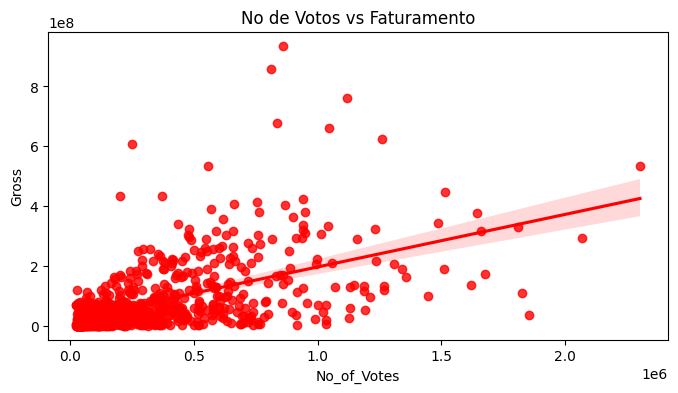

In [118]:
# No de Votos vs Faturamento
plt.figure(figsize=(8, 4))
plt.title("No de Votos vs Faturamento")
sns.regplot(x='No_of_Votes',y='Gross',data=df, color='red')
plt.show()

### Conclusão

As correlações mais relevantes para a <u>previsão da nota do IMDB</u> parecem ser com o <b>número de votos</b> recebidos e, em menor medida, com a <b>duração do filme</b> e o <b>Meta_score</b>. A relação com o ano de lançamento e o faturamento é mais fraca e menos significativa para previsões precisas.

</br></br>

# <b><u>Conclusões do EDA</b></u>

O gênero Drama predomina no conjunto de dados, mas <u>não há uma correlação significativa entre qualquer gênero específico e a nota dos filmes</u> no IMDb.</br>
As correlações entre gêneros e o Meta_score também são muito fracas.</br>

Os gêneros de <u>Ação e Aventura</u> mostram correlações positivas significativas com o faturamento (Gross), sugerindo que <u>esses filmes tendem a ter bons resultados de bilheteria</u>. Animações e Sci-Fi apresentam correlações positivas moderadas, enquanto filmes dramáticos mostram uma correlação negativa mais forte com o faturamento, indicando a necessidade de estratégias adicionais para sucesso comercial.

Foi necessário realizar uma padronização das classificações etárias dos filmes, mas esta não revelou correlações significativas com as notas (IMDB_Rating ou Meta_score). Contudo, há uma pequena correlação positiva entre a classificação 'PG' e o faturamento, sugerindo que <u>filmes voltados para o público em geral tendem a ter uma bilheteria maior</u>.

<u>A direção e o elenco influenciam consideravelmente na avaliação e na bilheteria dos filmes</u>, sendo fatores essenciais a serem considerados durante a modelagem de machine learning.</br> 
Foi testado também um modelo com TfidfVectorizer que mostrou ser possível inferir o gênero do filme a partir da coluna "Overview" utilizando técnicas de processamento de linguagem natural (NLP).

Analisando a correlação entre as variáveis, observou-se que há uma correlação moderada positiva entre o número de votos recebidos (No_of_Votes) e o faturamento bruto (Gross), sugerindo que <u>filmes que recebem mais votos tendem a ter uma bilheteria mais alta</u>. Há também uma correlação positiva fraca entre a duração do filme (Runtime) e a nota do IMDb (IMDB_Rating), indicando que filmes mais longos podem tender a ter notas ligeiramente mais altas. As correlações entre a pontuação no Meta_score e outras variáveis, como número de votos e faturamento, são muito fracas, sugerindo que o Meta_score não está fortemente relacionado à popularidade ou ao sucesso financeiro do filme.

<u>As variáveis mais relevantes para a previsão da nota do IMDb parecem ser o número de votos recebidos, a duração do filme e, em menor medida, o Meta_score</u>. A relação com o ano de lançamento e o faturamento é mais fraca e menos significativa.

</br></br>

# <b><u>Recomendação de filmes</b></u>

### Criando um sistema de recomendação de filmes

Vamos criar um modelo de recomendação de filmes usando TfidfVectorizer e cosine_similarity.

Para fazer isso, primeiro criarei uma nova coluna combinando 'Overview' com Gênero, Diretor e Atores, pois quero que todos sejam levados em consideração.


In [119]:
df.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2',
       'Star3', 'Star4', 'No_of_Votes', 'Gross', 'Genre1', 'Genre2', 'Genre3'],
      dtype='object')

In [120]:
# Criar uma nova coluna combinada
df['combined_features'] = df['Overview'] + ' ' + df['Genre'].str.replace(',', '') + ' ' + df['Director'] + ' ' + df['Star1']+ ' ' + df['Star2'] + ' ' + df['Star3'] + ' ' + df['Star4']


In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vetorizar a coluna combinada
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features = 10000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_features'])

In [122]:
from sklearn.metrics.pairwise import cosine_similarity

# Calcular a similaridade do cosseno
cosine_sim = cosine_similarity(tfidf_matrix)

In [123]:
def get_recommendations(movie):
    index = df[df['Series_Title']==movie].index[0]
    distance = sorted(list(enumerate(cosine_sim[index])),reverse=True,key=lambda vector:vector[1])
    for i in distance[1:10]:
        print(f"{df.loc[i[0]].Series_Title}")

### Exemplos de uso:

In [124]:
# Exemplo 1
get_recommendations('The Godfather')

The Godfather: Part III
The Godfather: Part II
Apocalypse Now
On the Waterfront
Glengarry Glen Ross
The Conversation
The Insider
A Streetcar Named Desire
Sherlock Jr.


In [125]:
# Exemplo 2
get_recommendations('The Dark Knight')

Batman Begins
The Dark Knight Rises
The Prestige
Brokeback Mountain
Kill Bill: Vol. 1
Joker
Empire of the Sun
The Man Who Would Be King
The Machinist


In [126]:
# Exemplo 3
get_recommendations('The Lord of the Rings: The Return of the King')

The Lord of the Rings: The Two Towers
The Lord of the Rings: The Fellowship of the Ring
The Hobbit: The Desolation of Smaug
X-Men: Days of Future Past
The Hobbit: An Unexpected Journey
Green Book
The Dirty Dozen
The Right Stuff
Eastern Promises


In [127]:
# Exemplo 4
get_recommendations("The Avengers")

Captain America: Civil War
Arrival
Captain America: The Winter Soldier
Serenity
Iron Man
Avengers: Infinity War
The Day the Earth Stood Still
Avengers: Endgame
Interstellar


</br></br>

# <b><u>Criando o Modelo de Regressão</b></u>

## <u>Treinando o Modelo</u>

</br></br>
Primeiro Vamos remover as colunas crias durant o EDA:

In [128]:
df = df.drop(['Genre1', 'Genre2', 'Genre3', 'combined_features'], axis=1)

In [129]:
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,R,175,"Crime, Drama",9.20,An organized crime dynasty's aging patriarch t...,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.00
1,The Dark Knight,2008,PG,152,"Action, Crime, Drama",9.00,When the menace known as the Joker wreaks havo...,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.00
2,The Godfather: Part II,1974,R,202,"Crime, Drama",9.00,The early life and career of Vito Corleone in ...,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.00
3,12 Angry Men,1957,G,96,"Crime, Drama",9.00,A jury holdout attempts to prevent a miscarria...,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.00
4,The Lord of the Rings: The Return of the King,2003,G,201,"Action, Adventure, Drama",8.90,Gandalf and Aragorn lead the World of Men agai...,94.00,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.00


</br></br>
Importando ferramentas do sklearn:

In [130]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

</br></br>
Vou utilizar o MultiLabelBinarizer para analizar Genero e Atores.

Por isso criei as funções a segir, deixandos todos generose atores em colunas indivisuais, em fornato de lista:</br>

In [131]:
# Função para dividir os gêneros em listas
def split_genres(X):
    X = X.copy()
    X['Genre'] = X['Genre'].apply(lambda x: x.split(', '))
    return X

In [132]:
# Função para agrupar elenco em uma lista
def combine_cast(X):
    X = X.copy()
    X['Elenco'] = X[['Star1', 'Star2', 'Star3', 'Star4']].values.tolist()
    return X.drop(columns=['Star1', 'Star2', 'Star3', 'Star4'])

</br></br>
Separando X e y e aplicando as funções:

In [133]:
# Separar recursos (X) e alvo (y)
X = df.drop(columns=['Series_Title', 'IMDB_Rating'])
y = df['IMDB_Rating']

In [134]:
# Aplicar a função split_genres e combine_cast
X = split_genres(X)
X = combine_cast(X)

In [135]:
X.head()

,Released_Year,Certificate,Runtime,Genre,Overview,Meta_score,Director,No_of_Votes,Gross,Elenco
0,1972,R,175,"[Crime, Drama]",An organized crime dynasty's aging patriarch t...,100.00,Francis Ford Coppola,1620367,134966411.00,"[Marlon Brando, Al Pacino, James Caan, Diane K..."
1,2008,PG,152,"[Action, Crime, Drama]",When the menace known as the Joker wreaks havo...,84.00,Christopher Nolan,2303232,534858444.00,"[Christian Bale, Heath Ledger, Aaron Eckhart, ..."
2,1974,R,202,"[Crime, Drama]",The early life and career of Vito Corleone in ...,90.00,Francis Ford Coppola,1129952,57300000.00,"[Al Pacino, Robert De Niro, Robert Duvall, Dia..."
3,1957,G,96,"[Crime, Drama]",A jury holdout attempts to prevent a miscarria...,96.00,Sidney Lumet,689845,4360000.00,"[Henry Fonda, Lee J. Cobb, Martin Balsam, John..."
4,2003,G,201,"[Action, Adventure, Drama]",Gandalf and Aragorn lead the World of Men agai...,94.00,Peter Jackson,1642758,377845905.00,"[Elijah Wood, Viggo Mortensen, Ian McKellen, O..."


</br></br>
MultiLabelBinarizer

In [136]:
# Instanciar MultiLabelBinarizer e ajustar ao conjunto completo
mlb_genre = MultiLabelBinarizer()
mlb_cast = MultiLabelBinarizer()

mlb_genre.fit(X['Genre'])
mlb_cast.fit(X['Elenco'])

MultiLabelBinarizer()

</br></br>

In [137]:
# Dividir em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

</br></br>

In [138]:
# Função para transformar gêneros e elenco com o MultiLabelBinarizer ajustado
def transform_genres_and_cast(X):
    X = X.copy()
    genres_transformed = mlb_genre.transform(X['Genre'])
    cast_transformed = mlb_cast.transform(X['Elenco'])
    
    genres_df = pd.DataFrame(genres_transformed, columns=mlb_genre.classes_)
    cast_df = pd.DataFrame(cast_transformed, columns=mlb_cast.classes_)
    
    X.reset_index(drop=True, inplace=True)
    genres_df.reset_index(drop=True, inplace=True)
    cast_df.reset_index(drop=True, inplace=True)
    
    return pd.concat([X.drop(columns=['Genre', 'Elenco']), genres_df, cast_df], axis=1)


</br></br>
ColumnTransformer

In [139]:
# Definir o transformador de colunas
preprocessor = ColumnTransformer(
    transformers=[
        ('overview', TfidfVectorizer(), 'Overview'),
        ('num', StandardScaler(), ['Released_Year', 'Runtime', 'Meta_score', 'No_of_Votes', 'Gross']),
        ('cert', OneHotEncoder(handle_unknown='ignore'), ['Certificate']),
        ('director', OneHotEncoder(handle_unknown='ignore'), ['Director'])
    ],
    remainder='passthrough',
    sparse_threshold=0,
    n_jobs=-1
)

</br></br>
Construindo o Pipeline

In [140]:
# Construir o pipeline
model = Pipeline(steps=[
    ('genre_cast_transformer', FunctionTransformer(transform_genres_and_cast, validate=False)),
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

</br></br>
Treinando o modelo

In [141]:
# Treinar o modelo
model.fit(X_train, y_train)

D:\Projetos\lighthouse\2024-jul\venv\lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('genre_cast_transformer',
                 FunctionTransformer(func=<function transform_genres_and_cast at 0x0000026DB5356E60>)),
                ('preprocessor',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   sparse_threshold=0,
                                   transformers=[('overview', TfidfVectorizer(),
                                                  'Overview'),
                                                 ('num', StandardScaler(),
                                                  ['Released_Year', 'Runtime',
                                                   'Meta_score', 'No_of_Votes',
                                                   'Gross']),
                                                 ('cert',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Certificate']),
                                                 ('director',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Director'])])),
                ('regressor', LinearRegression())])

</br></br>

## <u>Avaliando o Modelo</u>

In [142]:
y_pred = model.predict(X_test)
np.set_printoptions(precision=2)

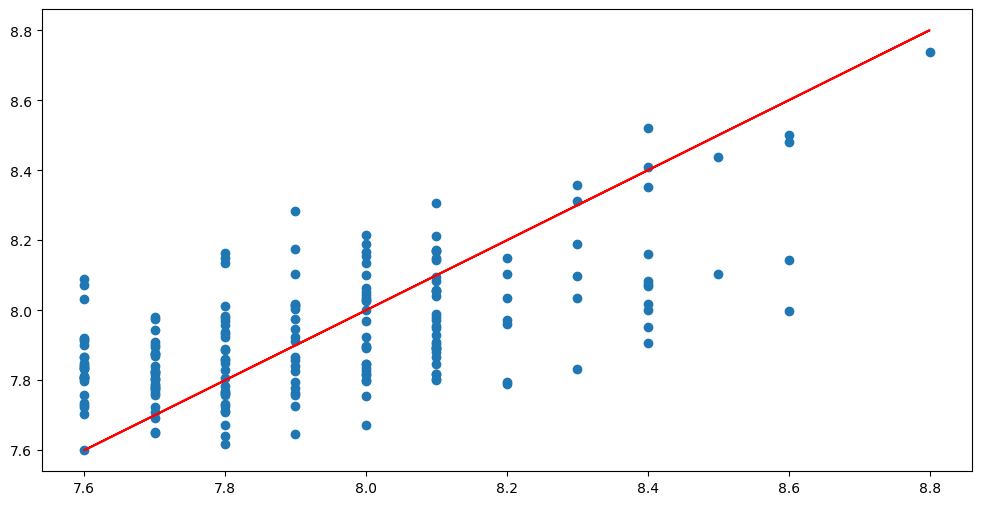

In [143]:
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
plt.figure(figsize=(12,6))
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, 'r')

In [144]:
# Making predictions and getting metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print('MSE: ', round(mse, 2))
print('MAE: ', round(mae, 2))
print('R^2: ', round(r2, 2))
print('Training score: ', format(train_score, '.2%'))
print('Testing score: ', format(test_score, '.2%'))

MSE:  0.04
MAE:  0.16
R^2:  0.39
Training score:  100.00%
Testing score:  38.98%


</br></br>

## <u>Salvando o Modelo</u>

In [145]:
import joblib

In [146]:
#joblib.dump(model, 'modelo_imdb.pkl')

# Salvar o modelo e os binarizadores
joblib.dump((model, mlb_genre, mlb_cast), 'modelo_imdb.pkl')

['modelo_imdb.pkl']

</br></br>

# <b><u>Testando o Modelo Gerado</b></u>

## <u>Funções para Pre-processamento:</u>

É necessário limpar os dados e convertê-los para o formato correto antes de utilizar o modelo pkl criado.

Para fazer isso usaremos as seguintes funções:

In [147]:
# Função para padronizar os itens da coluna Certificate
def padronizar_Certificate(cert):
    # Classificação Livre, Todos os públicos.
    if cert in ['U', 'G', 'TV-G']:
        return 'G' 
    # Parental Guidance. Orientação dos pais sugerida.
    elif cert in ['PG', 'GP', 'TV-PG', '12A', '12', 12, 'UA', 'U/A']:
        return 'PG' 
    # Parents Strongly Cautioned. Conteúdo inapropriado para crianças menores de 13 anos.
    elif cert in ['PG-13', 'TV-13', 'TV-14', '13', '14', '15', '16', 13, 14, 15, 16]:
        return 'PG-13' 
    # Mature Audience Only. Apenas para adultos.
    elif cert in ['R', 'A', 'TV-MA', 'NC-17', '17', '18', 17, 18]:
        return 'R'
    # Unrated, Passed, Approved, NAN, outros. Filmes sem classificação.
    else: 
        return 'Unrated'

In [148]:
# Função para dividir os gêneros em listas
def split_genres(X):
    X = X.copy()
    X['Genre'] = X['Genre'].apply(lambda x: x.split(', '))
    return X

In [149]:
# Função para agrupar elenco em uma lista
def combine_cast(X):
    X = X.copy()
    X['Elenco'] = X[['Star1', 'Star2', 'Star3', 'Star4']].values.tolist()
    return X.drop(columns=['Star1', 'Star2', 'Star3', 'Star4'])

In [150]:
# Função para o pre-processamento dos dados a testar (Utiliza as 3 funções acima):

def preprocess(new_df):
    new_df = new_df.copy()
    
    if new_df['Released_Year'].dtype == 'object':
        new_df['Released_Year'] = pd.to_numeric(new_df['Released_Year'], errors='coerce')
        mode_value = new_df['Released_Year'].mode()[0]
        new_df['Released_Year'] = new_df['Released_Year'].fillna(mode_value)
        new_df['Released_Year'] = new_df['Released_Year'].astype(int)
    
    if new_df['Runtime'].dtype == 'object':
        new_df['Runtime'] = new_df['Runtime'].apply(lambda x: x.replace(' min', '') if isinstance(x,str) else x)
        new_df['Runtime'] = new_df['Runtime'].astype(int)
    
    if new_df['Gross'].dtype == 'object':
        new_df['Gross'] = new_df['Gross'].str.replace(',', '')
        new_df['Gross'] = new_df['Gross'].astype(float)

    # Função definida anteriormente para padronizar classificação (Certificate)
    new_df['Certificate'] = new_df['Certificate'].apply(lambda cert: padronizar_Certificate(cert))
    # Função definida anteriormente para dividir gêneros
    new_df = split_genres(new_df)  
    # Função definida anteriormente para combinar elenco
    new_df = combine_cast(new_df)  
    

    return new_df

</br></br>

## <u>Carregando o Modelo</u>

In [151]:
import joblib

In [152]:
#loaded_model = joblib.load('modelo_imdb.pkl')

# Carregar o modelo e os binarizadores salvos
loaded_model, mlb_genre, mlb_cast = joblib.load('modelo_imdb.pkl')

</br></br>

## <u>Usando o Modelo para prever a nota:</u>


Supondo um filme com as seguintes características:

In [153]:
# Dados de entrada como um dicionário
data = {
    'Series_Title': 'The Shawshank Redemption',
     'Released_Year': '1994',
     'Certificate': 'A',
     'Runtime': '142 min',
     'Genre': 'Drama',
     'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
     'Meta_score': 80.0,
     'Director': 'Frank Darabont',
     'Star1': 'Tim Robbins',
     'Star2': 'Morgan Freeman',
     'Star3': 'Bob Gunton',
     'Star4': 'William Sadler',
     'No_of_Votes': 2343110,
     'Gross': '28,341,469'
}

</br></br>
Convertendo dados para o formato correto:

In [154]:
# Converter o dicionário para DataFrame
test_df = pd.DataFrame([data])

In [155]:
# Função para o pre-processamento dos dados a testar:
test_df = preprocess(test_df)

In [156]:
test_df

,Series_Title,Released_Year,Certificate,Runtime,Genre,Overview,Meta_score,Director,No_of_Votes,Gross,Elenco
0,The Shawshank Redemption,1994,R,142,[Drama],Two imprisoned men bond over a number of years...,80.00,Frank Darabont,2343110,28341469.00,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will..."


</br></br>
Usando o Modelo para prever a nota:

In [157]:
# Fazer previsões usando o modelo treinado
predictions = loaded_model.predict(test_df)

print("Previsões:", predictions)

Previsões: [9.55]


D:\Projetos\lighthouse\2024-jul\venv\lib\site-packages\sklearn\preprocessing\_label.py:900: UserWarning: unknown class(es) ['Bob Gunton', 'William Sadler'] will be ignored
  warnings.warn(


</br>

#### Nota prevista: 9.5
#### Nota no Site do IMDB: 9.3

fonte:</br>
https://www.imdb.com/title/tt0111161/

</br></br>

# <b><u>Respondendo as perguntas do Desafio:</b></u>

</br>

### <b>Qual filme você recomendaria para uma pessoa que você não conhece?</b>

Foi criado um sistema de recomendação de filmes usando TfidfVectorizer e cosine_similarity.</br>
Se uma pessoa falar que gostou de um filme específico, esse sistema retorna filmes similares, considerando gênero, elenco e descrição.</br>

Como exemplo utilizando o comando <b>get_recommendations("The Avengers")</b> será recomendado:</br>

    Captain America: Civil War
    Arrival
    Captain America: The Winter Soldier
    Serenity
    Iron Man
    Avengers: Infinity War
    The Day the Earth Stood Still
    Avengers: Endgame
    Interstellar

</br>

### <b>Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?</b> 

No EDA, observamos que os gêneros de Ação e Aventura tendem a ter melhores resultados de bilheteria, seguidos por Animação e Sci-Fi. </br>
Filmes de Drama, embora sejam mais comuns no conjunto de dados, enfrentam mais dificuldades para alcançar sucesso comercial.</br>
</br>
Quanto às classificações etárias, verificou-se que filmes voltados para o público em geral tendem a ter uma bilheteria maior.</br>
</br>
Também foi identificado que há uma correlação entre o número de votos recebidos e o faturamento, sugerindo que filmes com maior bilheteria tendem a receber mais votos no IMDb.</br>
Além disso, a direção e o elenco influenciam consideravelmente na avaliação e no faturamento dos filmes.</br>

</br>

### <b>Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?</b>

A coluna Overview apresenta informações úteis sobre o filme e podemos incluir uma análise de palavras e temas mais comuns no processo de aprendizado de maquina.

Da mesmo forma, é possível sim inferir o gênero do filme a partir da coluna "Overview", utilizando técnicas de NLP. Eu fiz um teste com TfidfVectorizer para criar um modelo que tenta prever o Gênero a partir do texto.

</br>

### <b>Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?</b>

Optei por um modelo de regressão linear, para realizar a previsão da nota do imdb. As variáveis foram tratadas da seguinte forma:

Coluna Series_Title: </br>
foi removido da análise

Coluna Overview:</br>
utilizado TfidfVectorizer para analizar texto.

Colunas Genre, Star1, Star2, Star3, Star4:</br>
Um filme pode ter pode ter de um a três gêneros.</br>
Além disso, um ator na coluna Star1 poderia aparecer na Star2 em um outro filme.</br>
por isso utilizei MultiLabelBinarizer na Coluna Genre e em uma concatenação das colunas Star*</br>

Colunas Certificate e Director:</br>
são variáveis categóricas, por isso foi utilizado OneHotEncoder

Colunas Released_Year, Runtime, Meta_score, No_of_Votes, Gross:</br>
variáveis quantitativas, foi utilizado o utilizado StandardScaler

Para verificar a eficiência do modelo calculei o Erro Quadrático Médio (RMSE), erro médio absoluto (MAE) e o R² score. Além do teste prático com o filme 'The Shawshank Redemption'.



</br>

### <b>Supondo o filme 'The Shawshank Redemption' Qual seria a nota do IMDB?</b>

O modelo criado previu uma <b>nota 9.5</b> enquanto a nota real no site do IMDB é de 9.3.


</br></br>


